In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")

In [276]:
df=pd.read_csv("DailyData.csv")

In [277]:
data=df.drop(['campaign name', 'cost_micros',
       'bidding_strategy_type', 'cost_per_conversion'],inplace=False,axis=1)

In [278]:
data['date']=pd.to_datetime(data.date)

In [279]:
data.index=data['date']

In [280]:
data

,date,clicks,impressions,conversions,Click-through rate (CTR),average cost per click (CPC),cost-per-acquisition (CPA),Cost,conversion per euro
date,,,,,,,,,
2023-11-28,2023-11-28,0,33,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2023-11-29,2023-11-29,11,1139,1.000000,0.965759,0.369091,4.060000,4.06,0.246305
2023-11-30,2023-11-30,7,655,0.000000,1.068702,0.204286,4.085714,1.43,0.000000
2023-12-01,2023-12-01,5,684,0.000000,0.730994,0.528000,10.560000,2.64,0.000000
2023-12-02,2023-12-02,43,3792,3.332276,1.133966,0.244419,3.154000,10.51,0.317058
...,...,...,...,...,...,...,...,...,...
2024-05-17,2024-05-17,59,6297,1.100247,0.936954,0.387627,20.786242,22.87,0.048109
2024-05-18,2024-05-18,81,8337,0.501860,0.971573,0.277654,44.813295,22.49,0.022315
2024-05-19,2024-05-19,69,7438,2.835140,0.927669,0.321014,7.812665,22.15,0.127997


In [313]:
data['CPA']=data['cost-per-acquisition (CPA)']
data['CTR']=data['Click-through rate (CTR)']
data['CPC']=data['average cost per click (CPC)']

KeyError: 'cost-per-acquisition (CPA)'

In [314]:
data.drop(['cost-per-acquisition (CPA)','Click-through rate (CTR)','average cost per click (CPC)'],axis=1,inplace=True)

KeyError: "['cost-per-acquisition (CPA)', 'Click-through rate (CTR)', 'average cost per click (CPC)'] not found in axis"

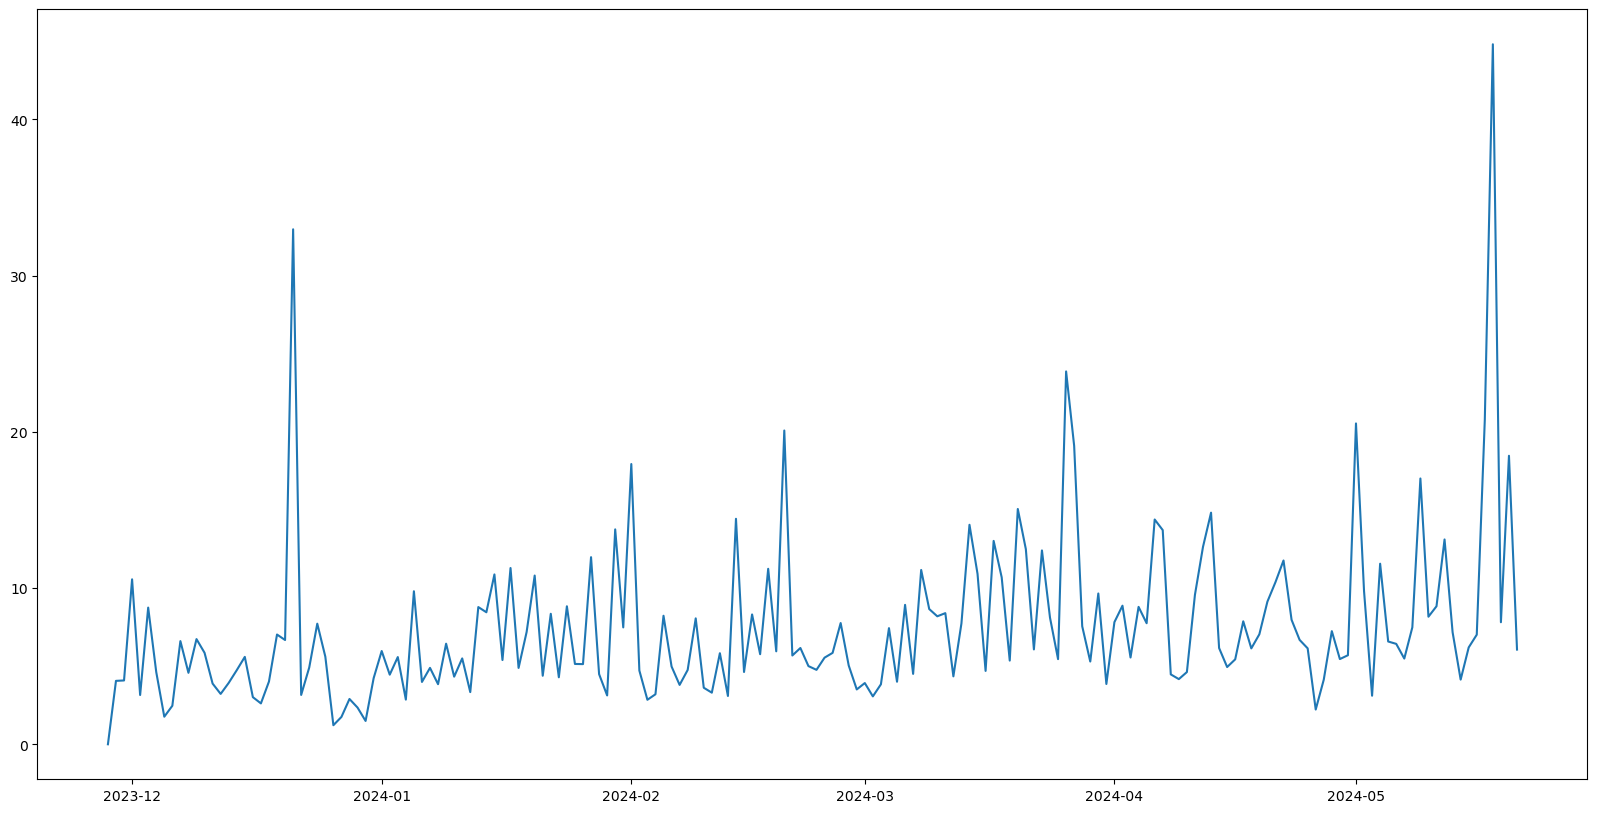

In [315]:
plt.plot(data['CPA'])

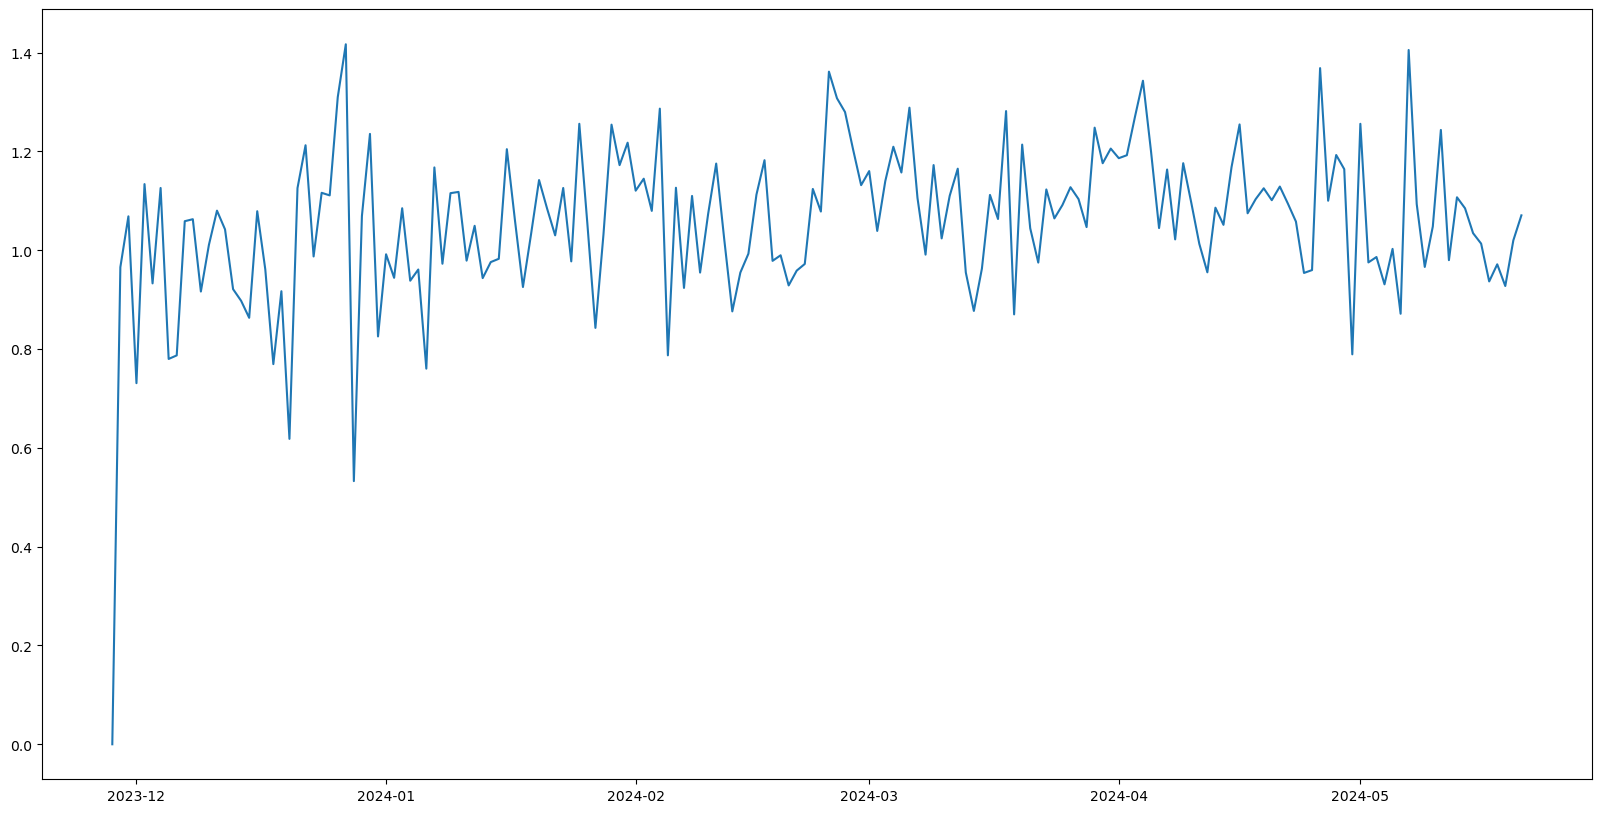

In [316]:
plt.plot(data['CTR'])

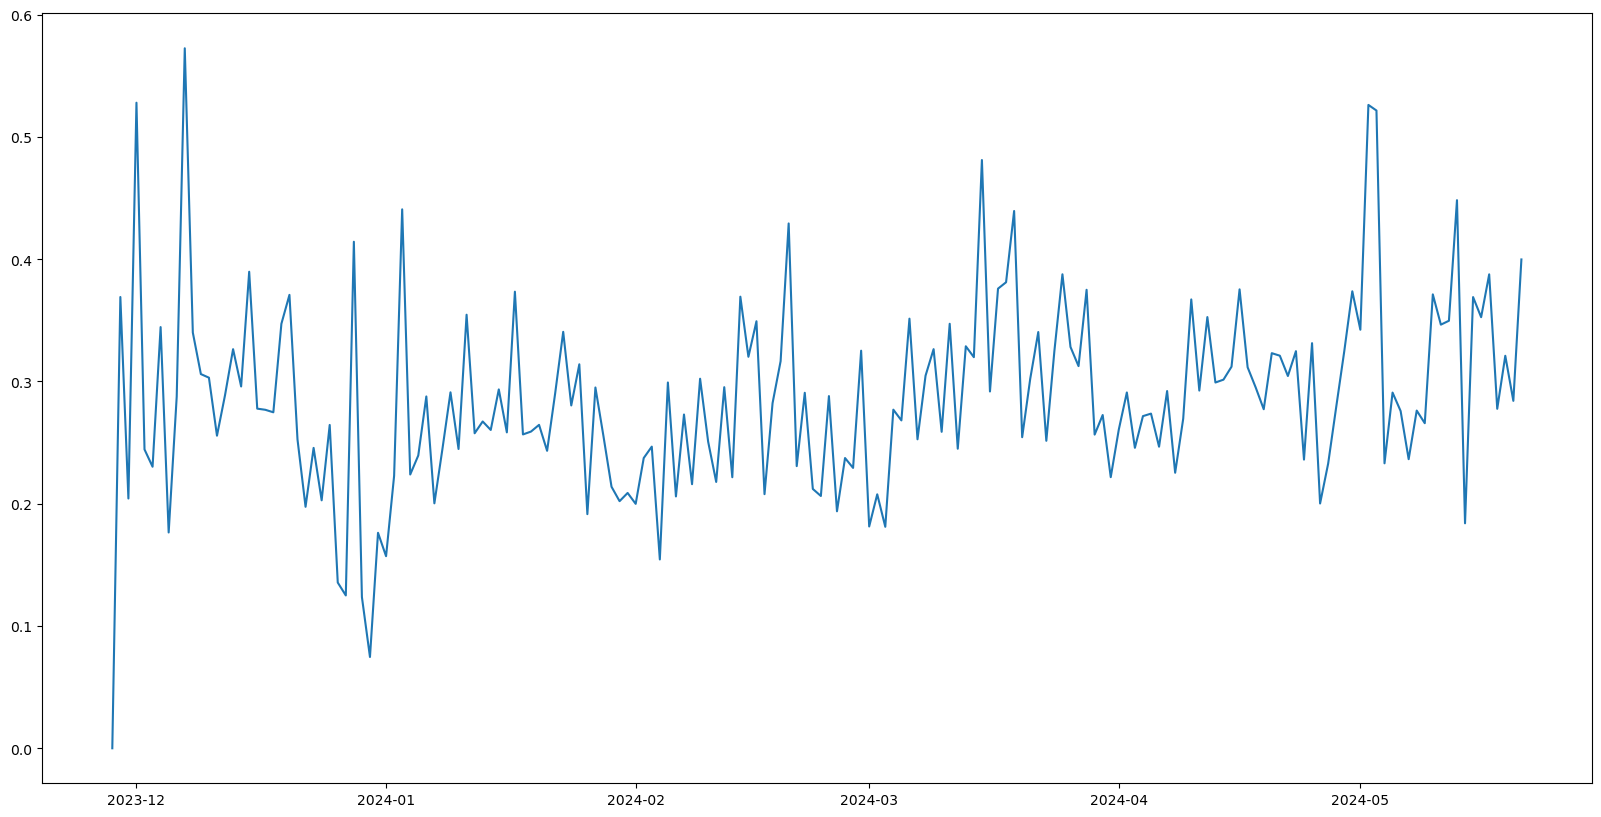

In [317]:
plt.plot(data['CPC'])

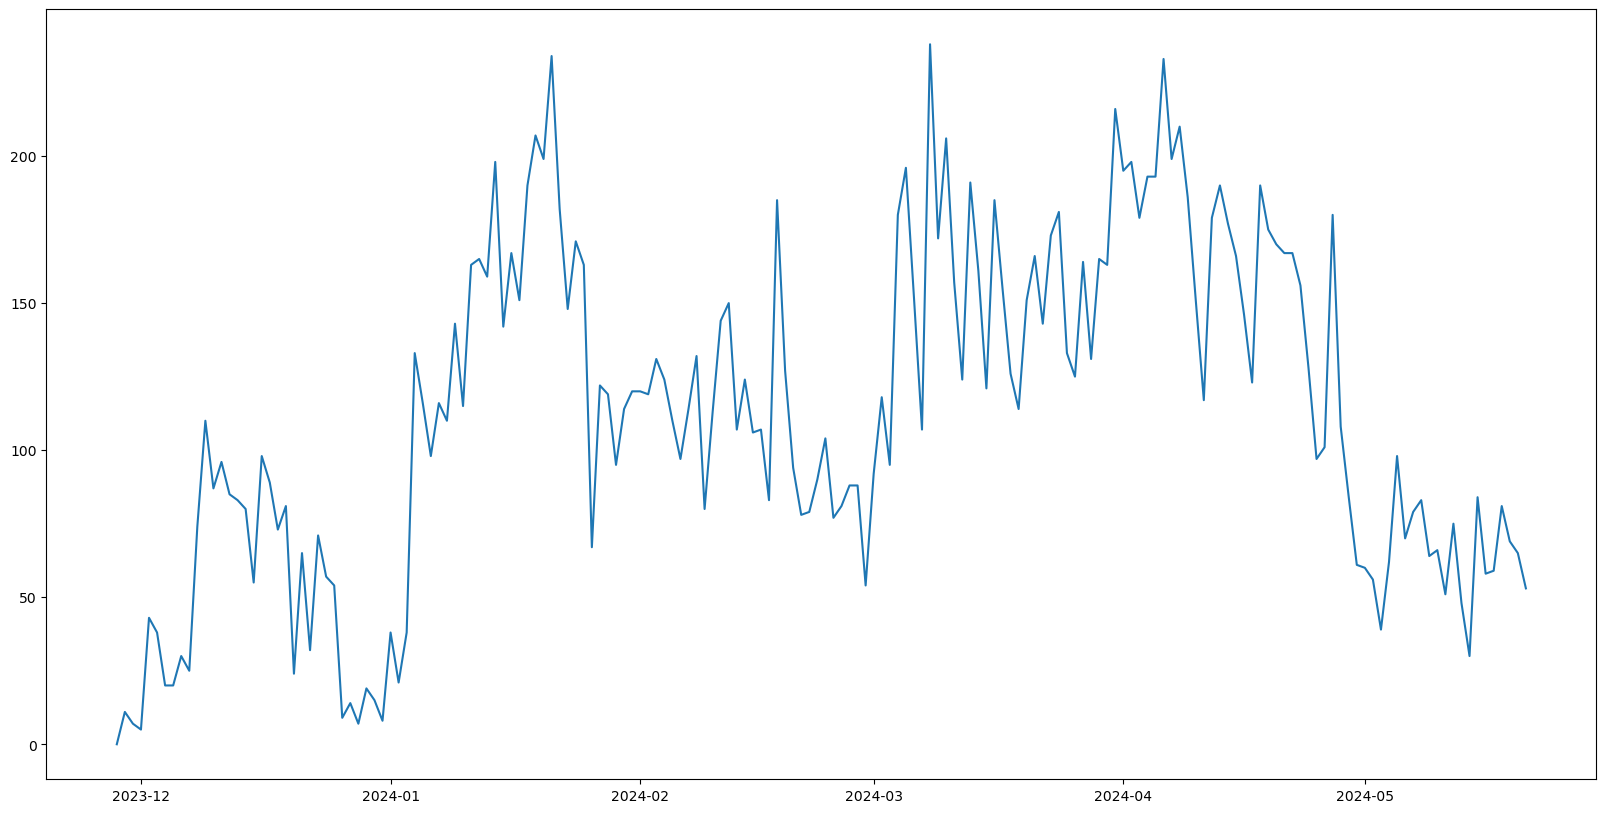

In [318]:
plt.plot(data['clicks'])

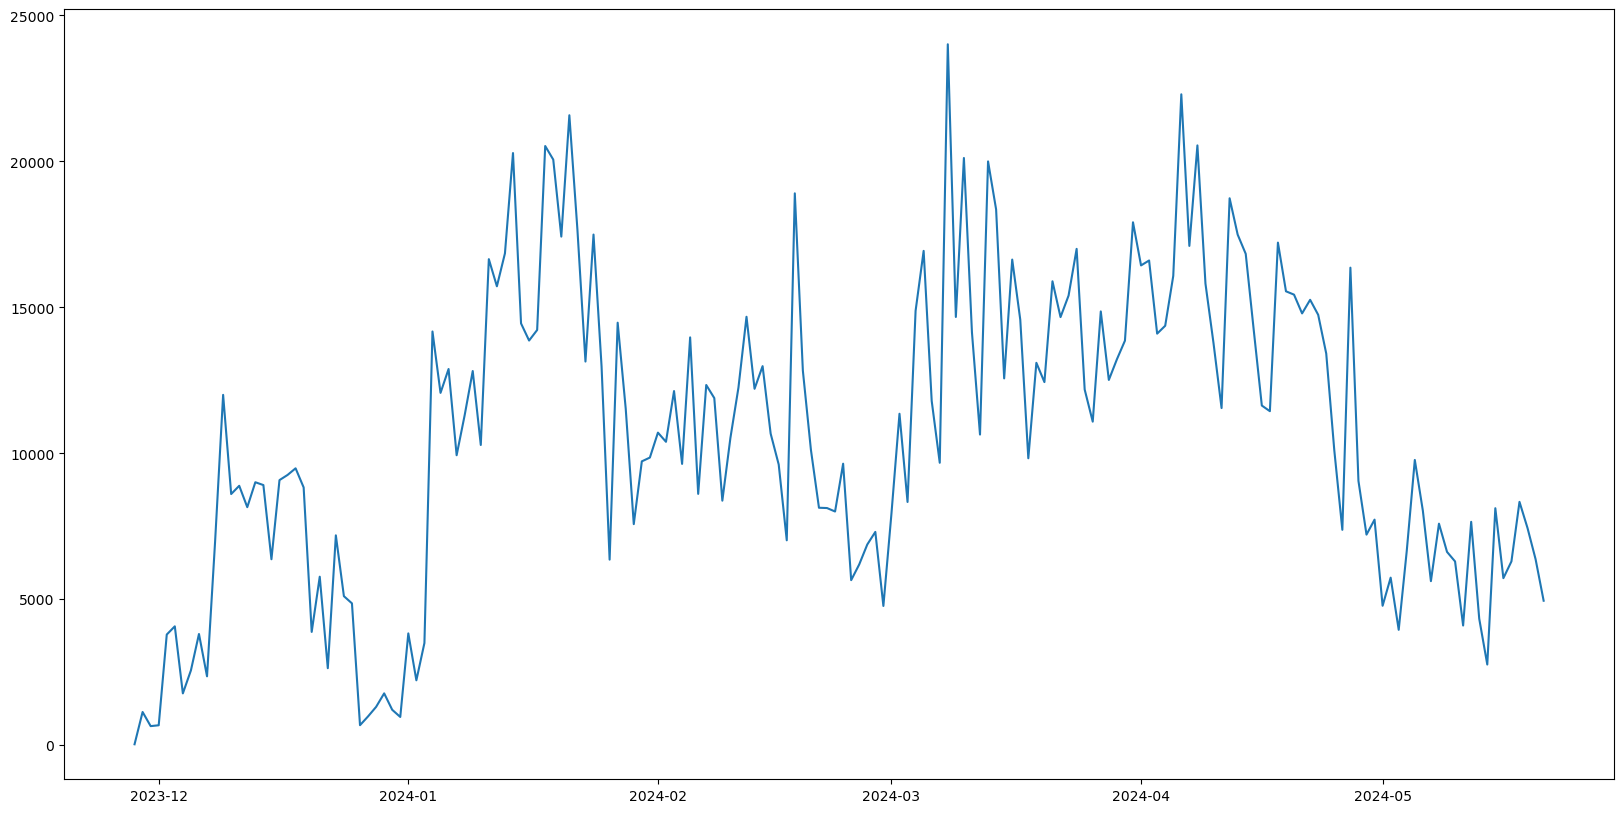

In [319]:
plt.plot(data['impressions'])

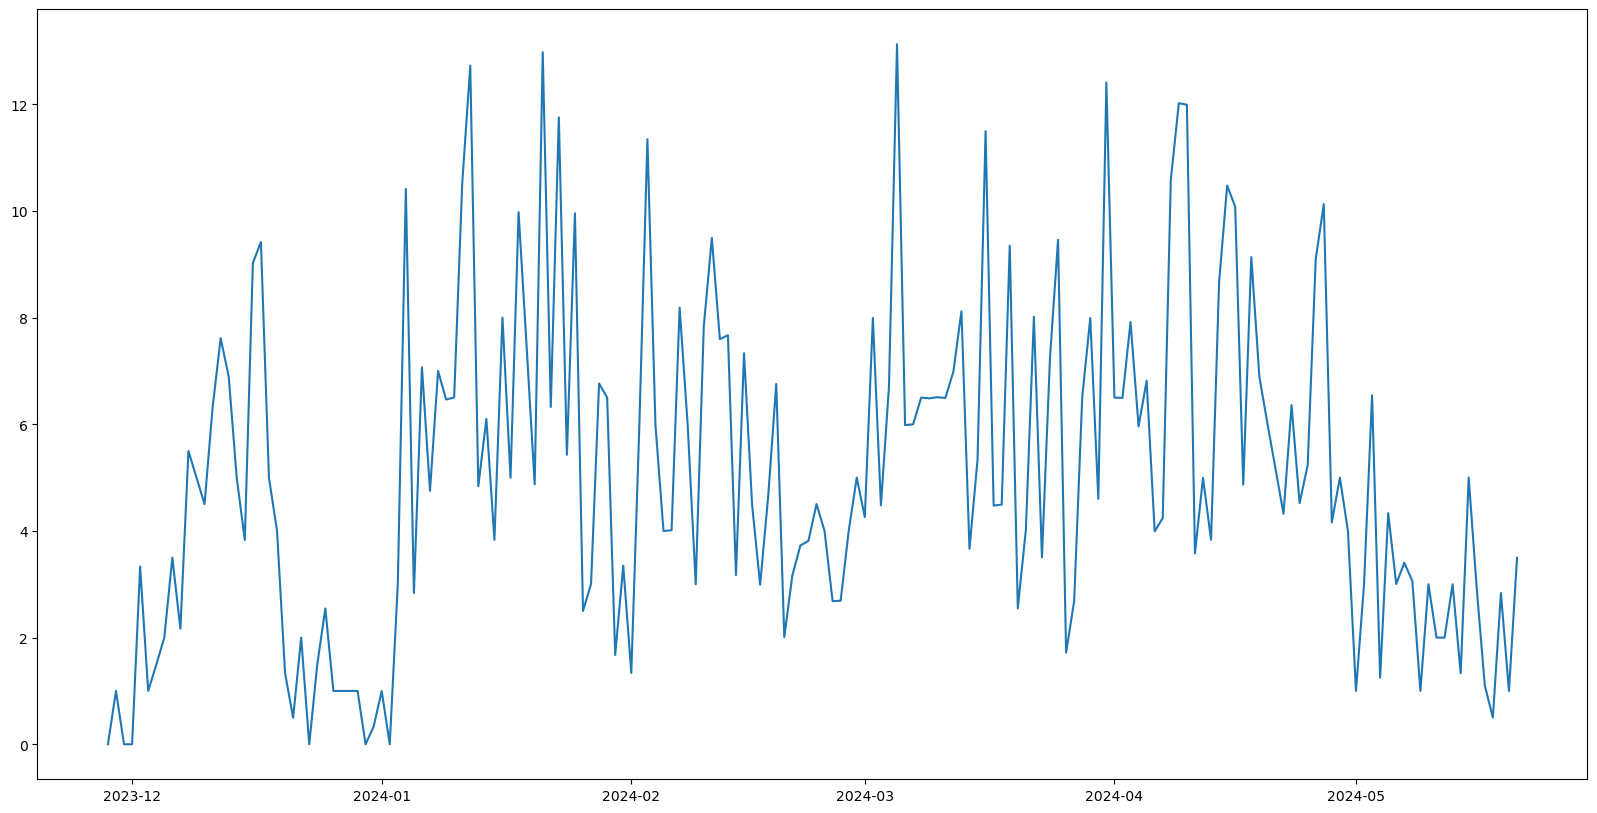

In [320]:
plt.plot(data['conversions'])

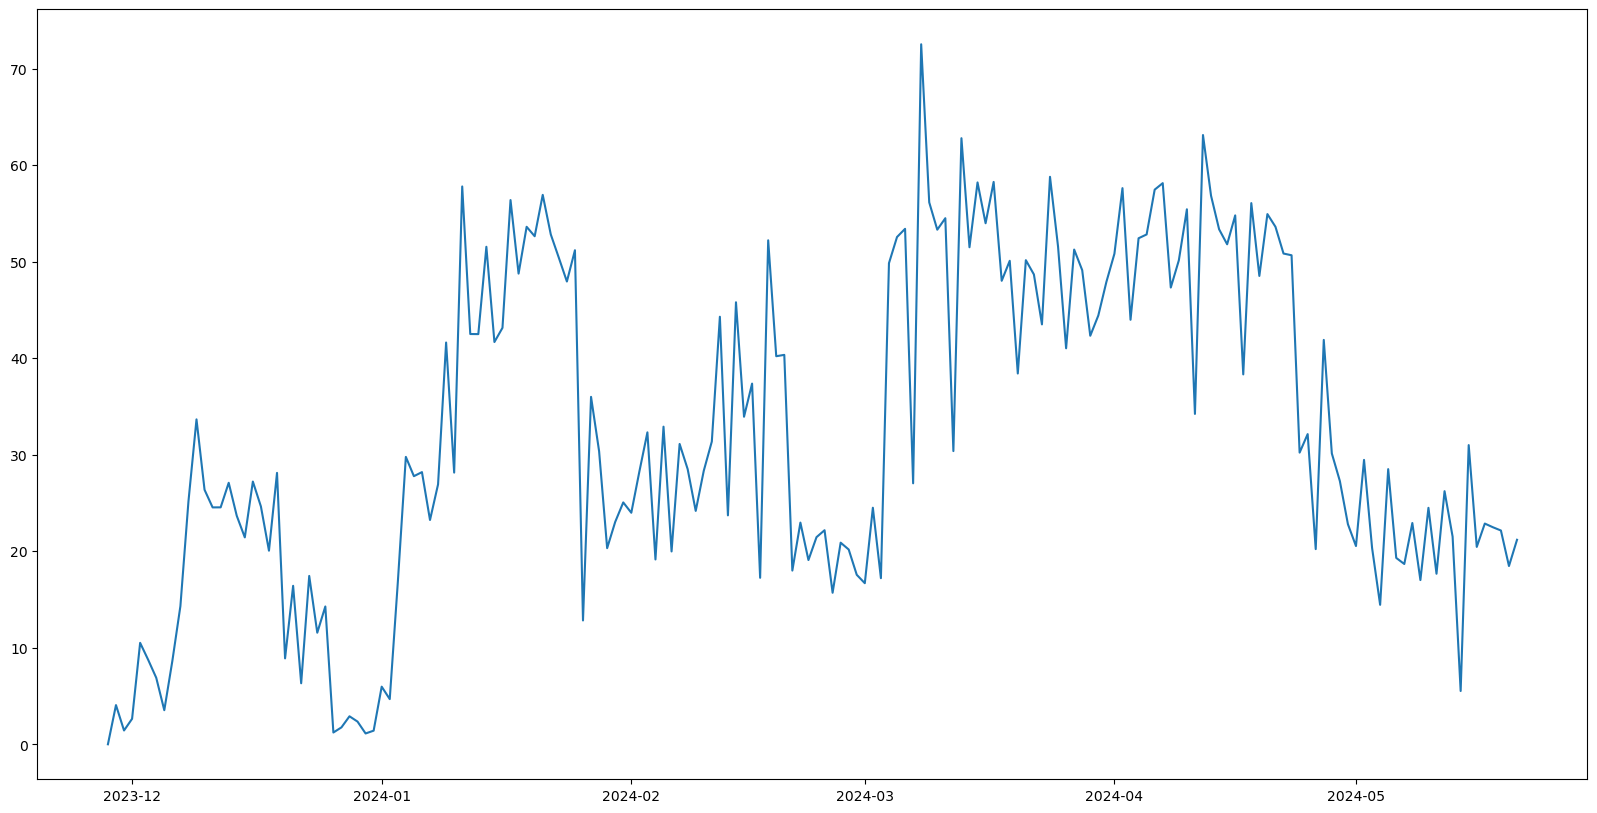

In [321]:
plt.plot(data['Cost'])

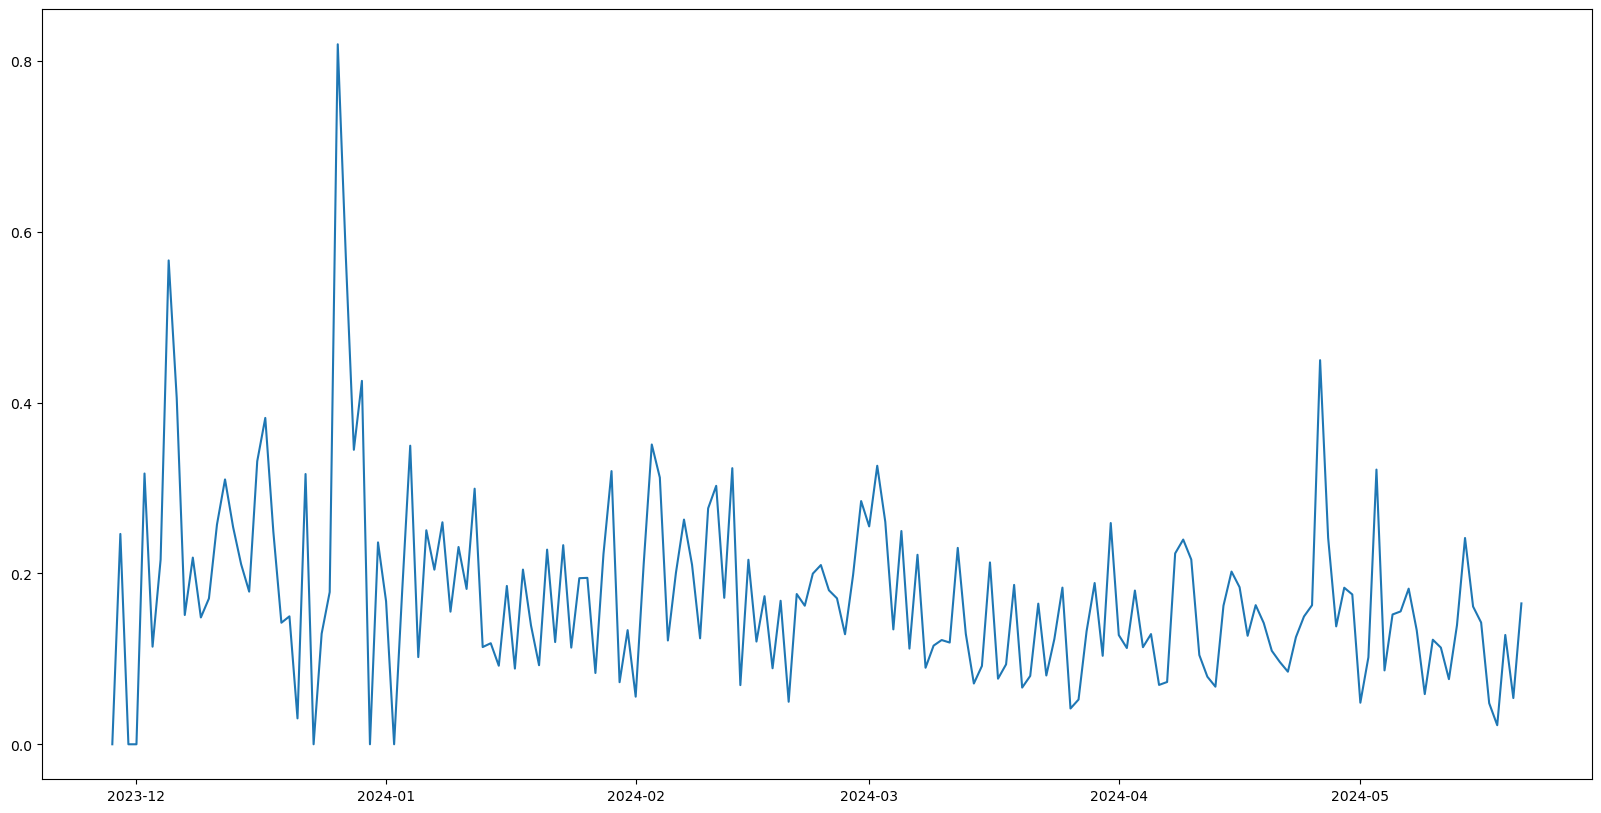

In [322]:
plt.plot(data['conversion per euro'])

In [323]:
train=data.iloc[:160]

In [324]:
test=data.iloc[160:]

In [325]:
train_original=train.copy
test_original=test.copy

In [326]:
for i in (train,test,train_original,test_original):
    i['year']=i.date.dt.year
    i['month']=i.date.dt.month
    i['day']=i.date.dt.day
    i['dayofweek']=i.date.dt.dayofweek
    #i['Hour']=i.date.dt.hour

AttributeError: 'function' object has no attribute 'date'

In [327]:
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0

In [328]:
temp2=train['date'].apply(applyer)
train['weekend']=temp2

In [329]:
train

,date,clicks,impressions,conversions,Cost,conversion per euro,CPA,CTR,CPC,year,month,day,dayofweek,weekend
date,,,,,,,,,,,,,,
2023-11-28,2023-11-28,0,33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023,11,28,1,0
2023-11-29,2023-11-29,11,1139,1.000000,4.060000,0.246305,4.060000,0.965759,0.369091,2023,11,29,2,0
2023-11-30,2023-11-30,7,655,0.000000,1.430000,0.000000,4.085714,1.068702,0.204286,2023,11,30,3,0
2023-12-01,2023-12-01,5,684,0.000000,2.640000,0.000000,10.560000,0.730994,0.528000,2023,12,1,4,0
2023-12-02,2023-12-02,43,3792,3.332276,10.510000,0.317058,3.154000,1.133966,0.244419,2023,12,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,2024-05-01,60,4777,1.000000,20.540000,0.048685,20.540000,1.256018,0.342333,2024,5,1,2,0
2024-05-02,2024-05-02,56,5741,3.002452,29.466921,0.101892,9.814285,0.975440,0.526195,2024,5,2,3,0
2024-05-03,2024-05-03,39,3954,6.543285,20.342796,0.321651,3.108958,0.986343,0.521610,2024,5,3,4,0


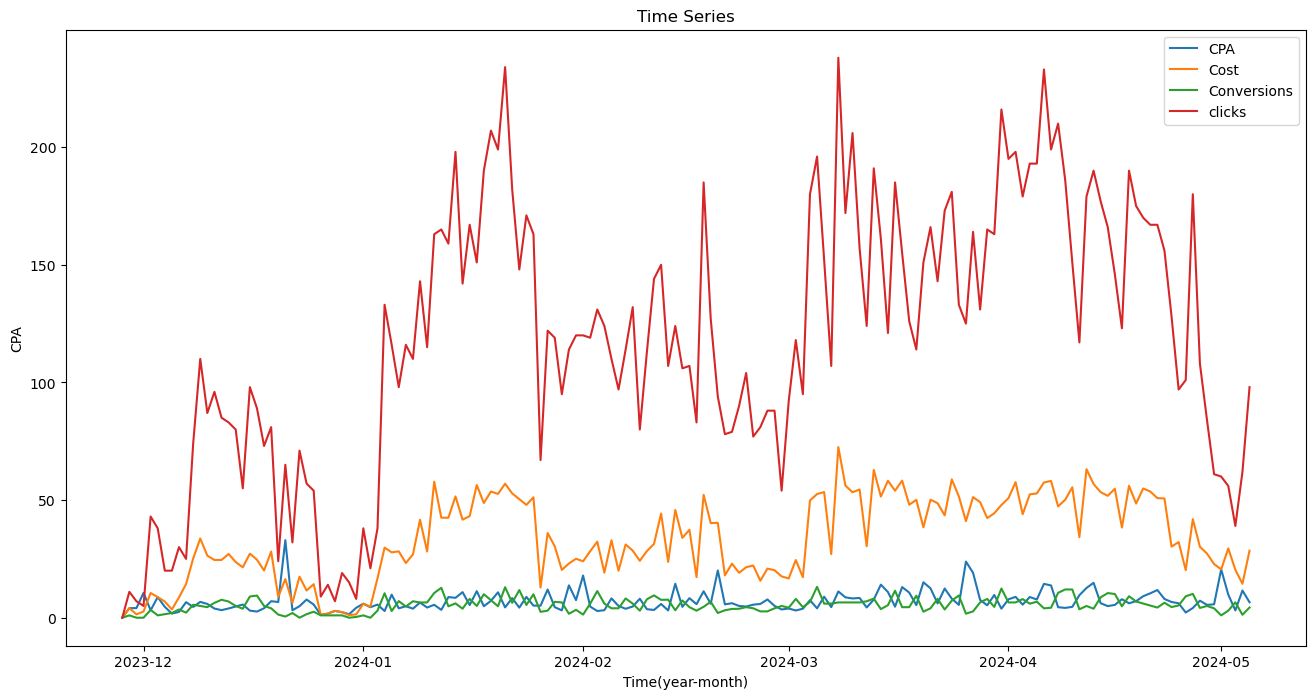

In [330]:
plt.figure(figsize=(16,8))
plt.plot(train['CPA'],label='CPA')
plt.plot(train['Cost'],label='Cost')
plt.plot(train['conversions'],label='Conversions')
plt.plot(train['clicks'],label='clicks')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('CPA')
plt.legend(loc='best')

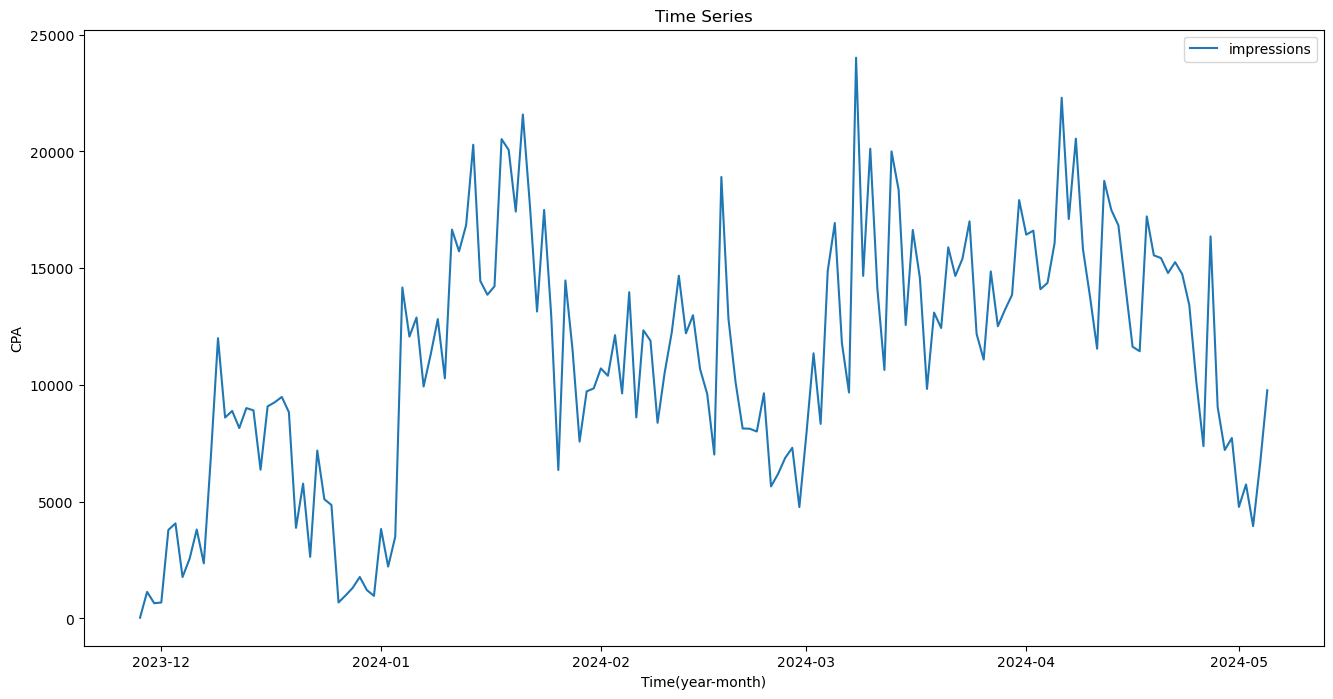

In [331]:
plt.figure(figsize=(16,8))
plt.plot(train['impressions'],label='impressions')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('CPA')
plt.legend(loc='best')

<Axes: xlabel='year'>

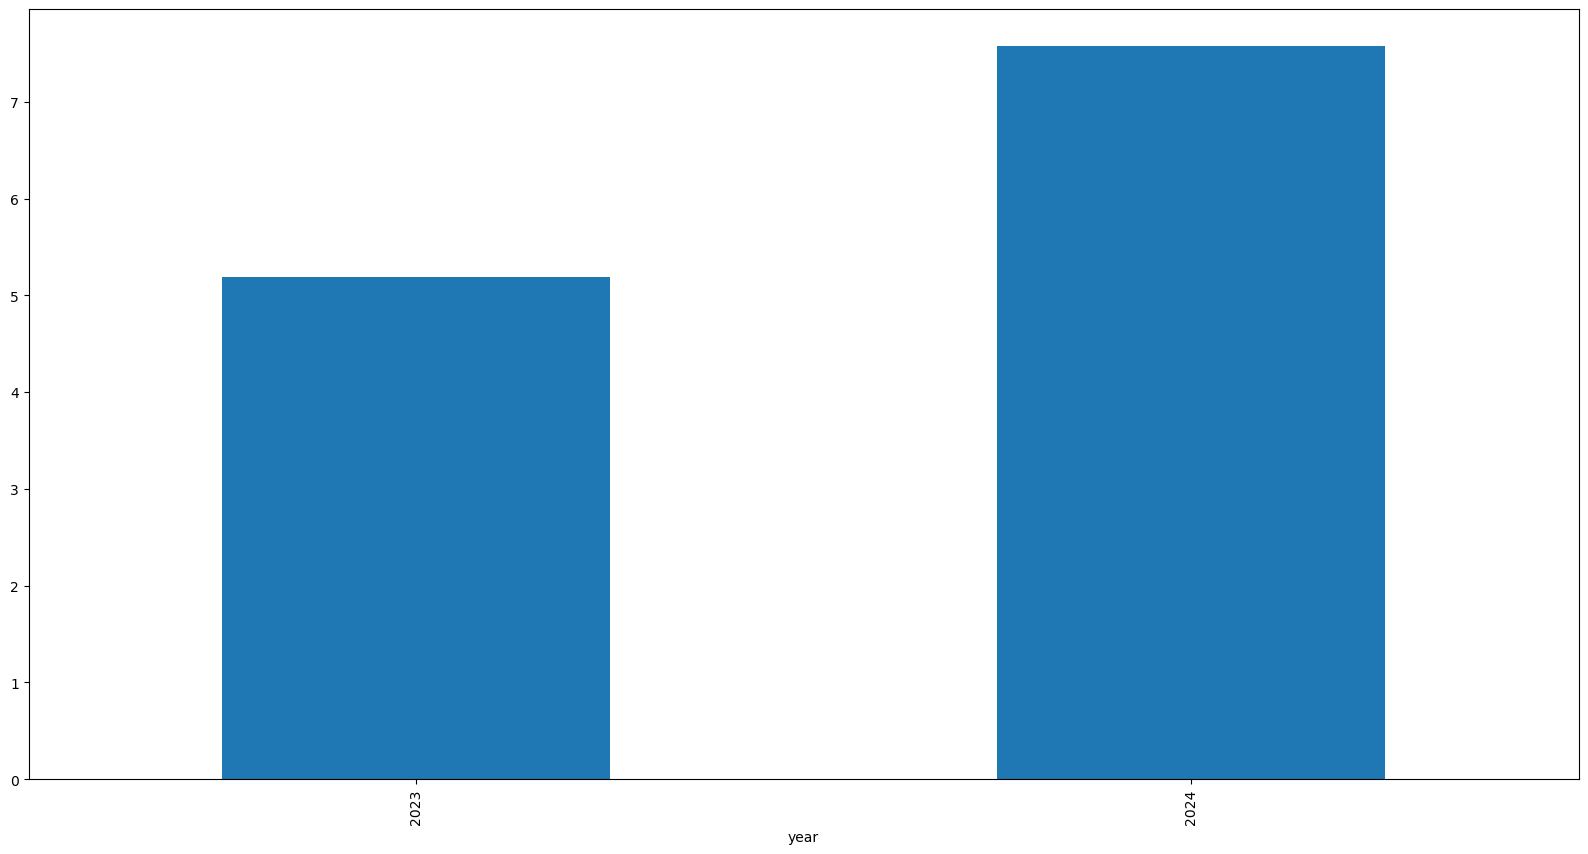

In [332]:
train.groupby('year')['CPA'].mean().plot.bar()

<Axes: xlabel='year'>

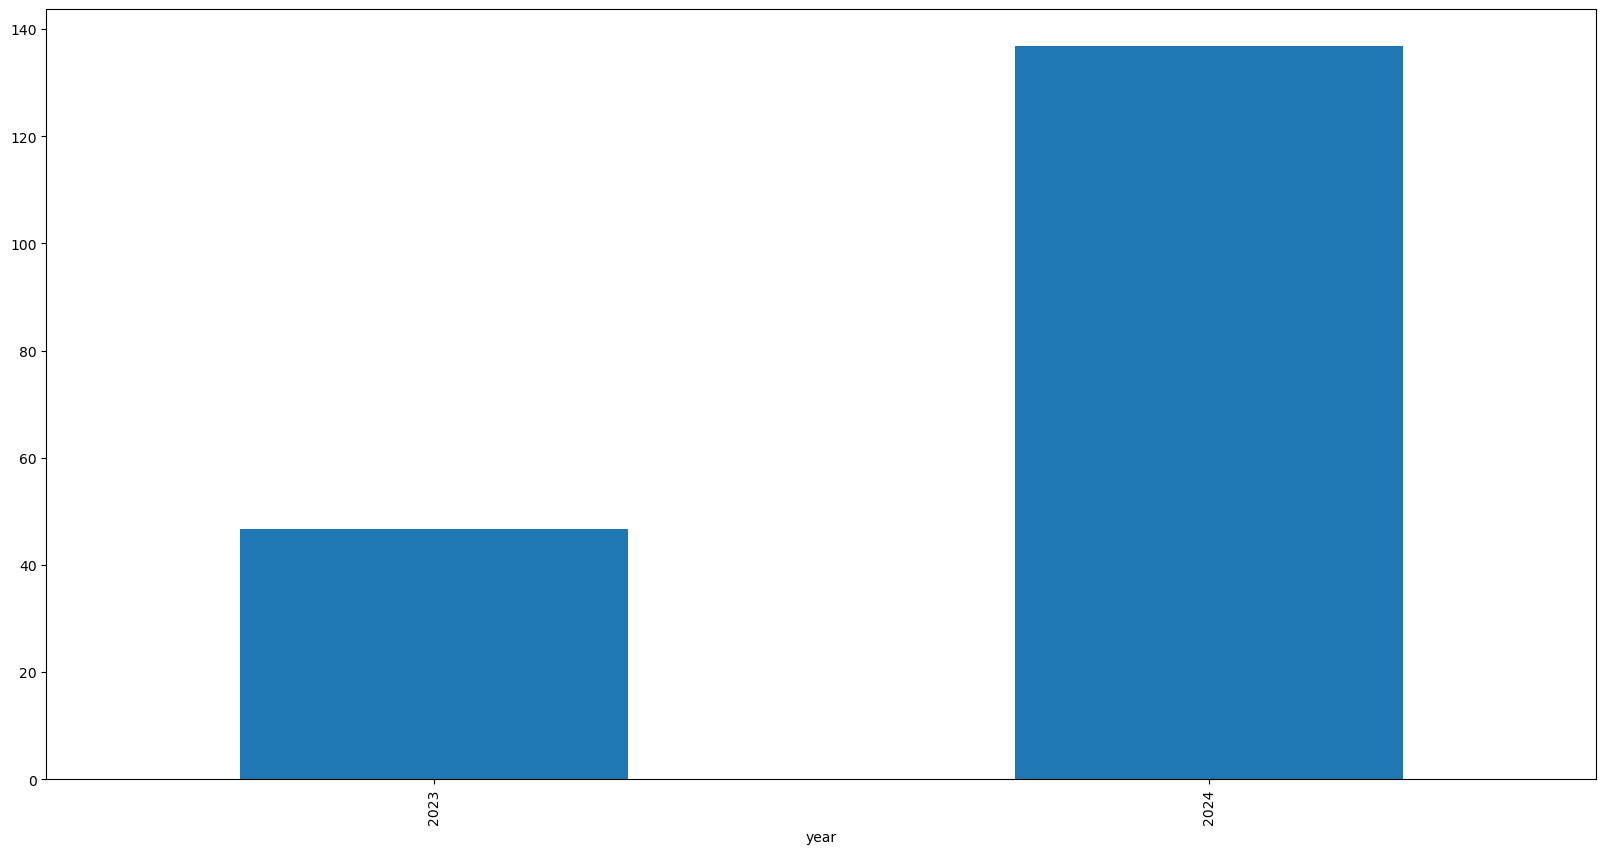

In [333]:
train.groupby('year')['clicks'].mean().plot.bar()

<Axes: xlabel='year'>

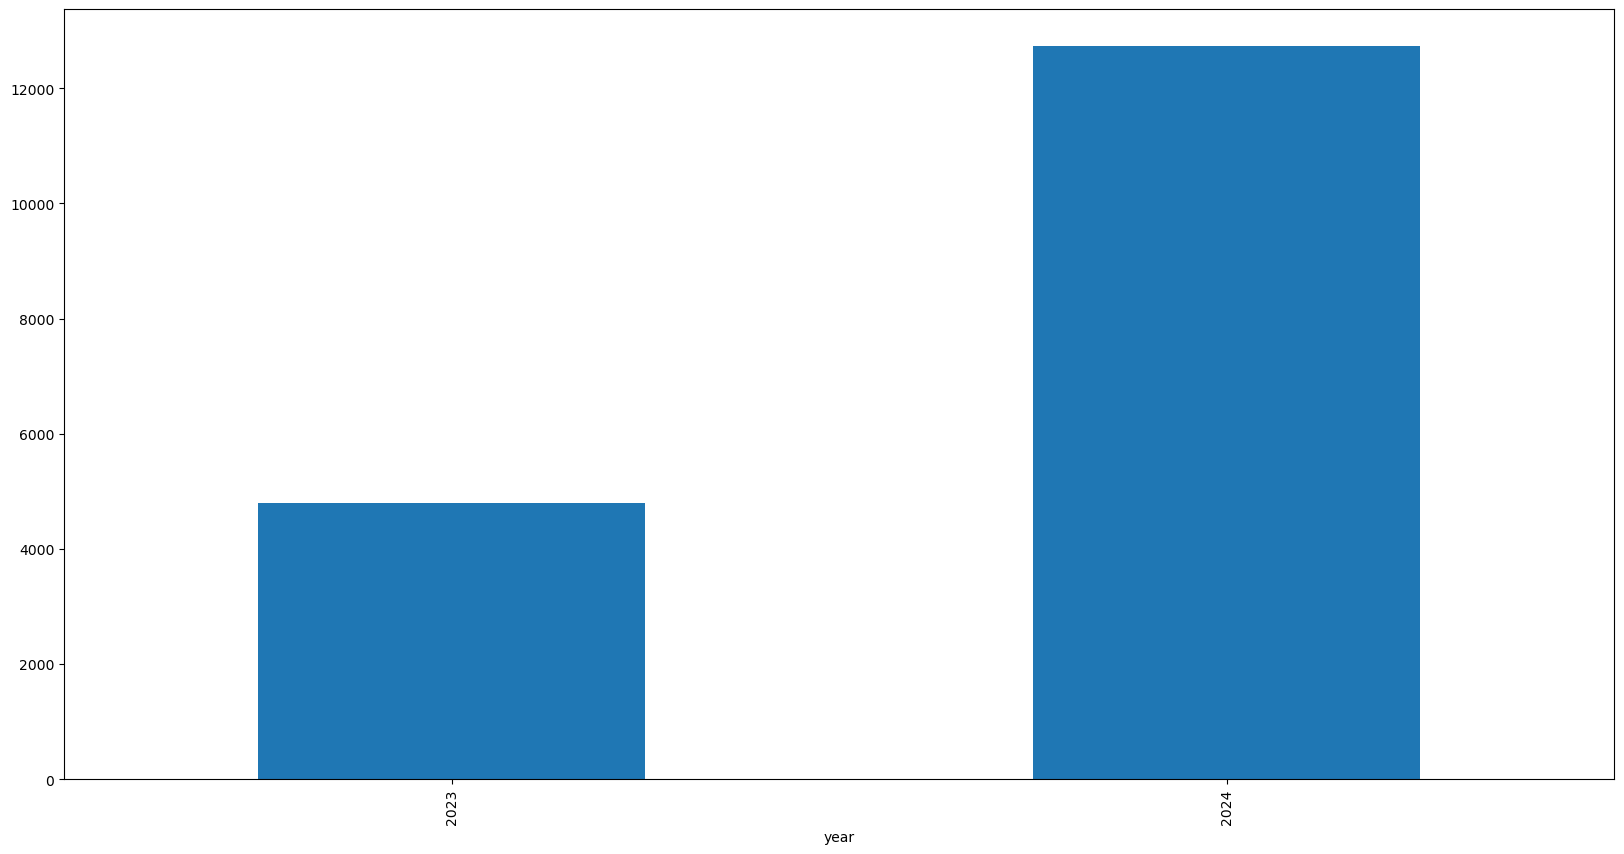

In [334]:
train.groupby('year')['impressions'].mean().plot.bar()

<Axes: xlabel='year'>

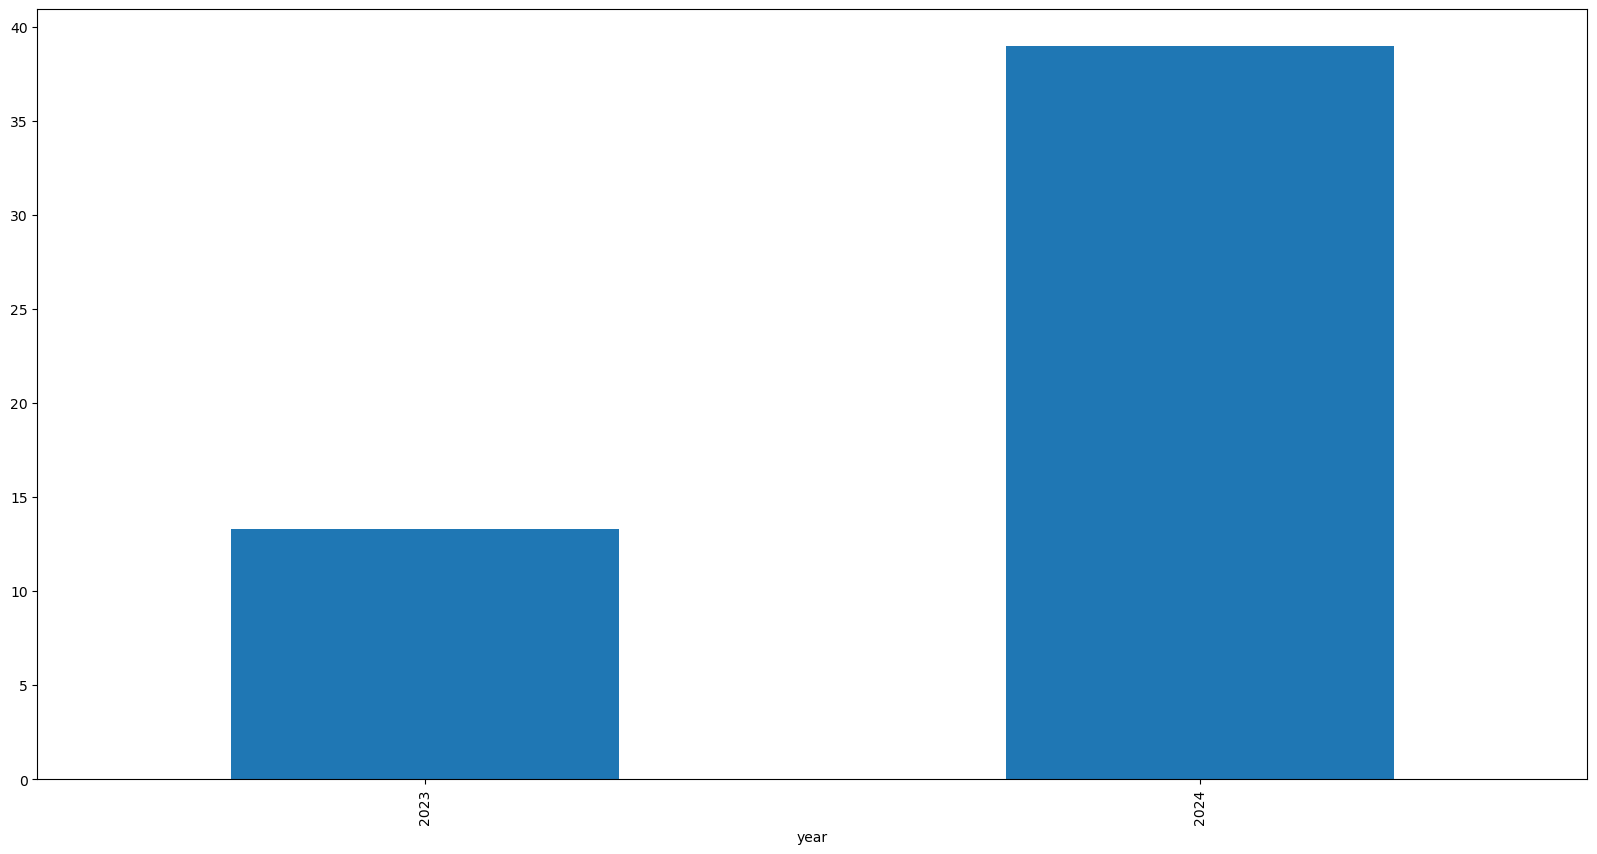

In [335]:
train.groupby('year')['Cost'].mean().plot.bar()

<Axes: xlabel='year'>

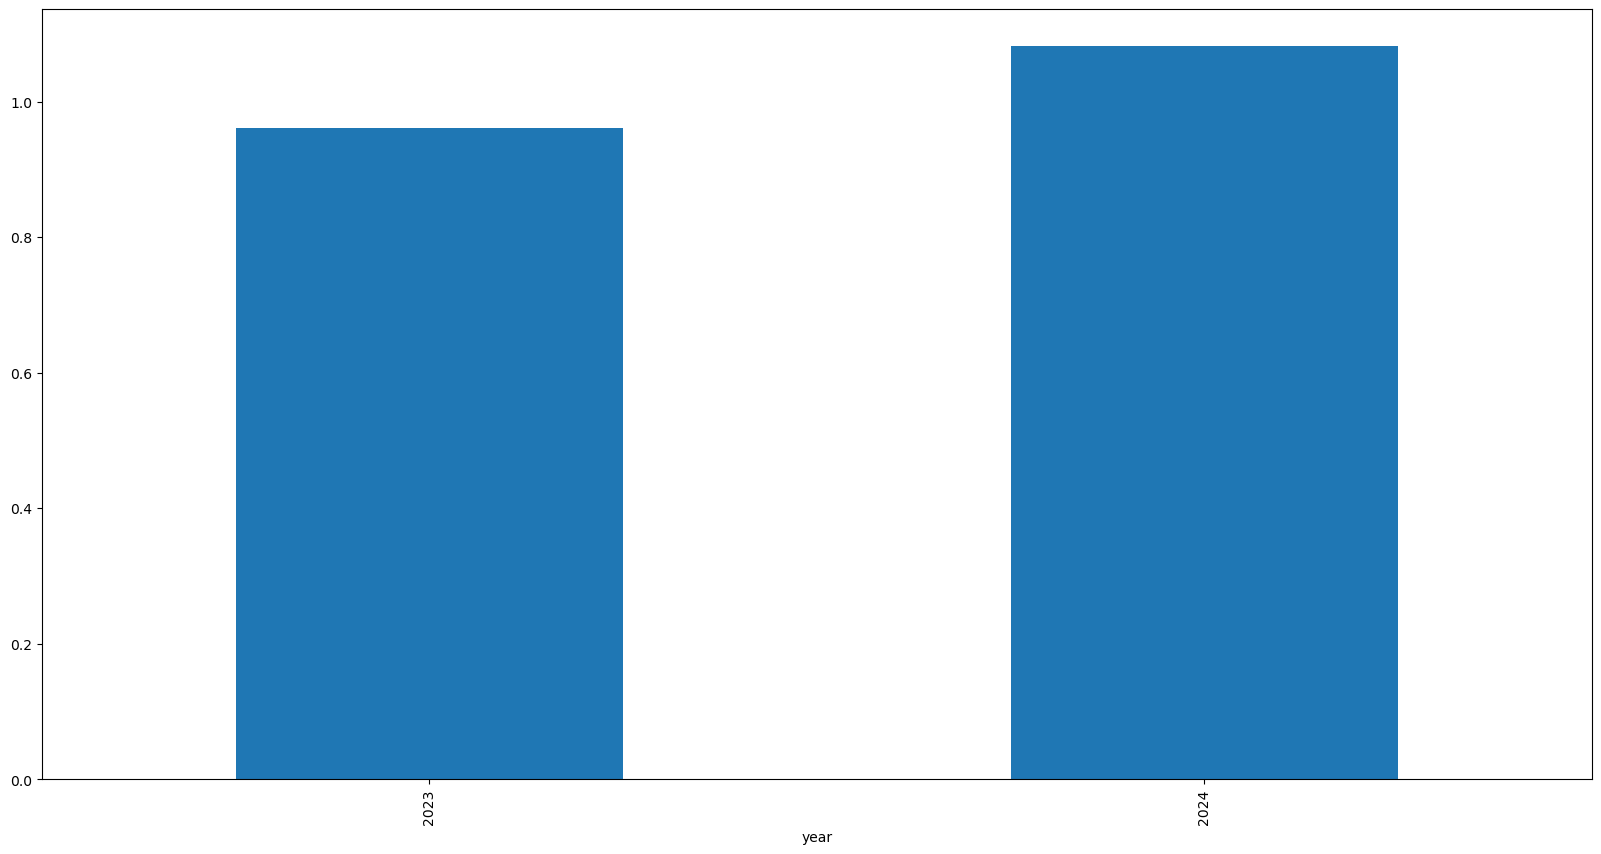

In [336]:
train.groupby('year')['CTR'].mean().plot.bar()

<Axes: xlabel='year'>

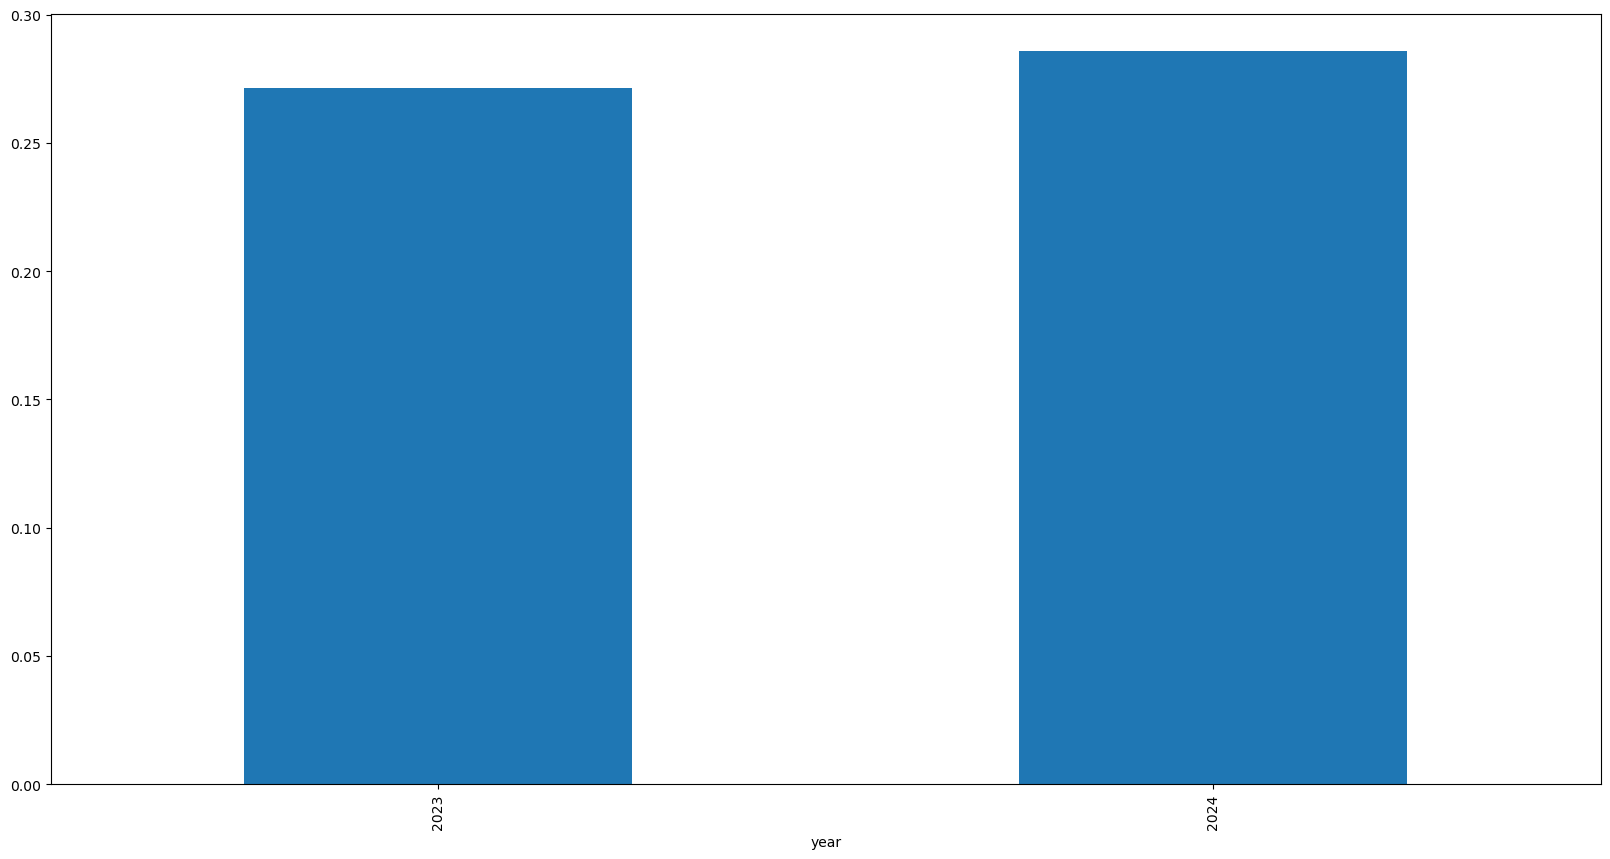

In [337]:
train.groupby('year')['CPC'].mean().plot.bar()

<Axes: xlabel='month'>

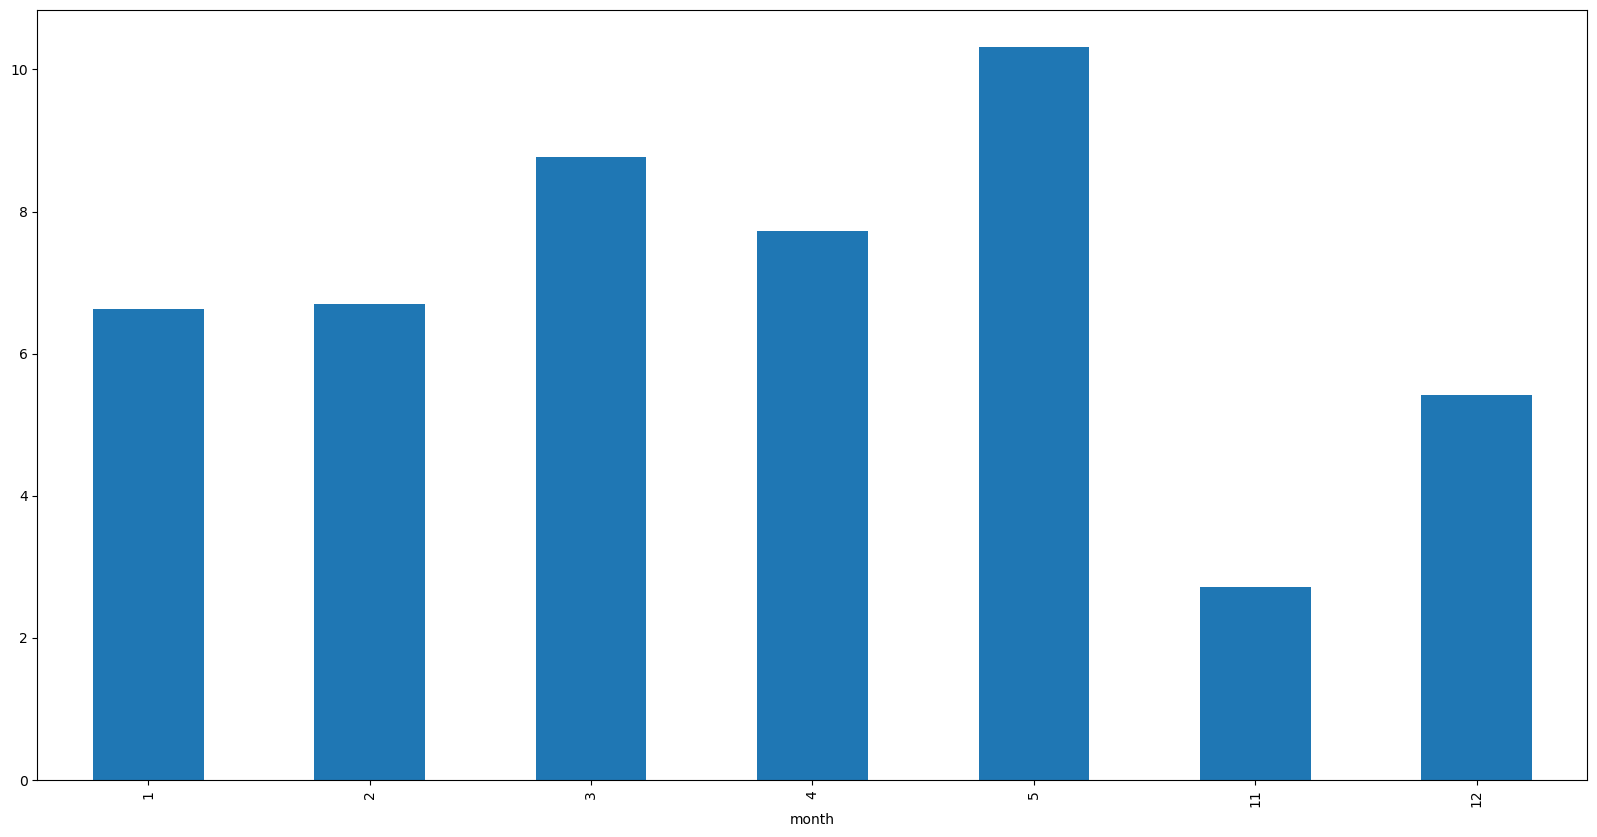

In [338]:
train.groupby('month')['CPA'].mean().plot.bar()

<Axes: xlabel='month'>

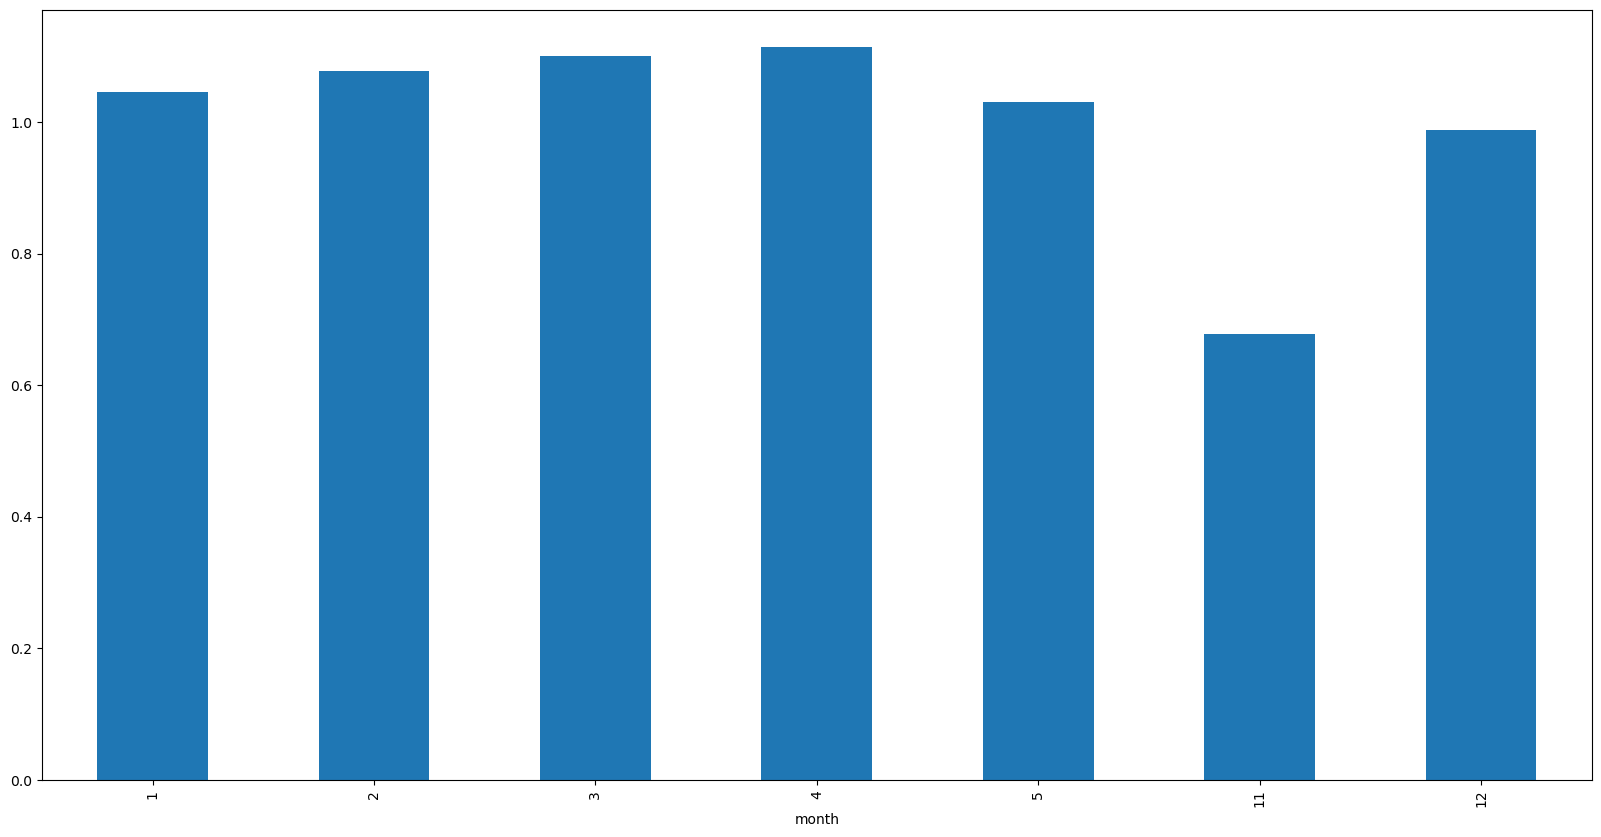

In [339]:
train.groupby('month')['CTR'].mean().plot.bar()

<Axes: xlabel='month'>

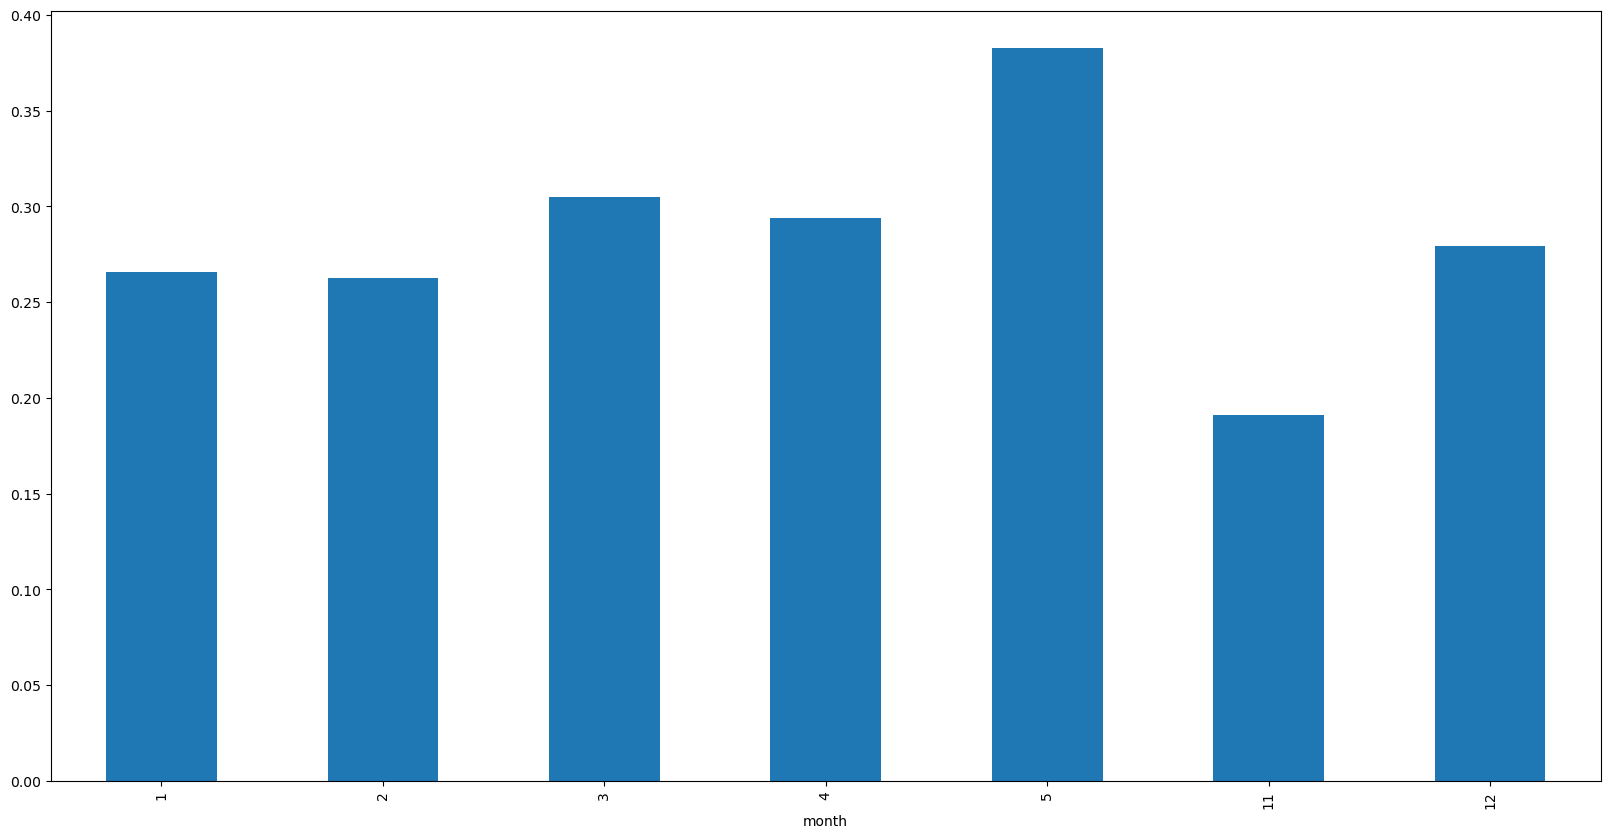

In [340]:
train.groupby('month')['CPC'].mean().plot.bar()

<Axes: xlabel='month'>

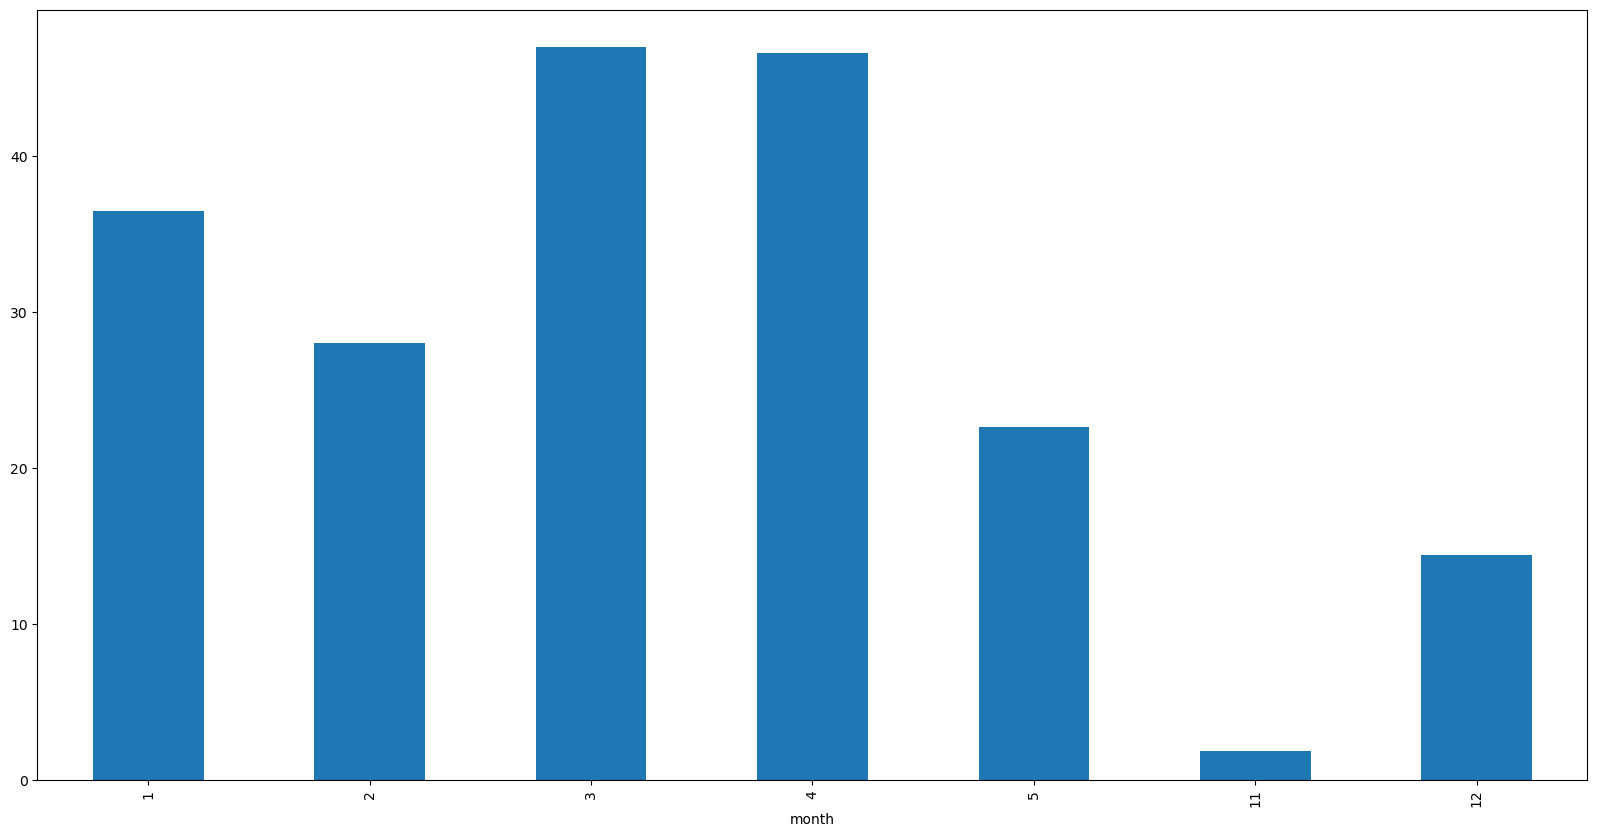

In [341]:
train.groupby('month')['Cost'].mean().plot.bar()

<Axes: xlabel='month'>

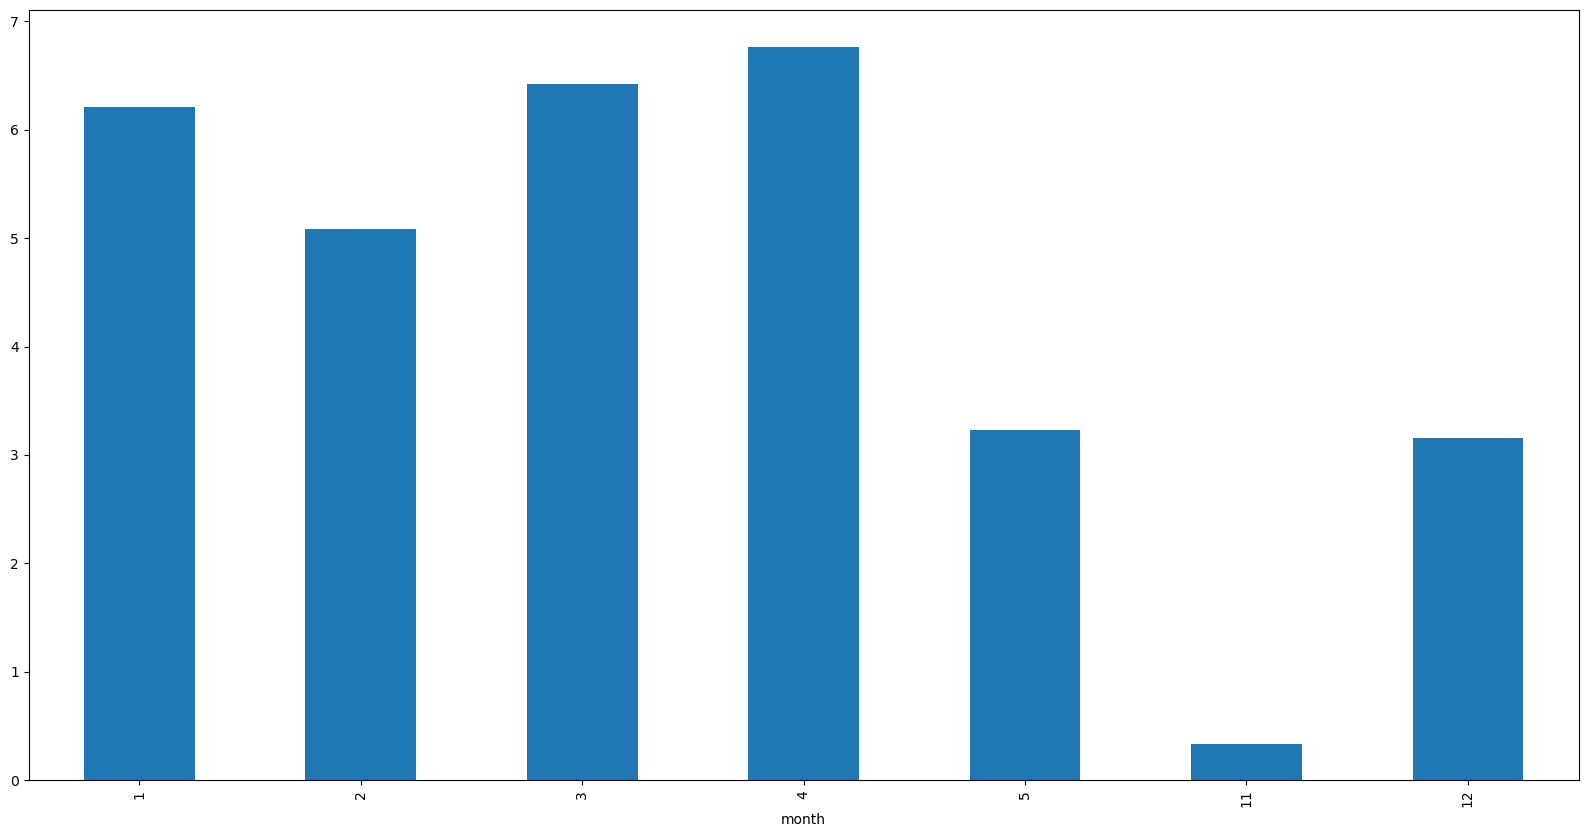

In [342]:
train.groupby('month')['conversions'].mean().plot.bar()

<Axes: xlabel='month'>

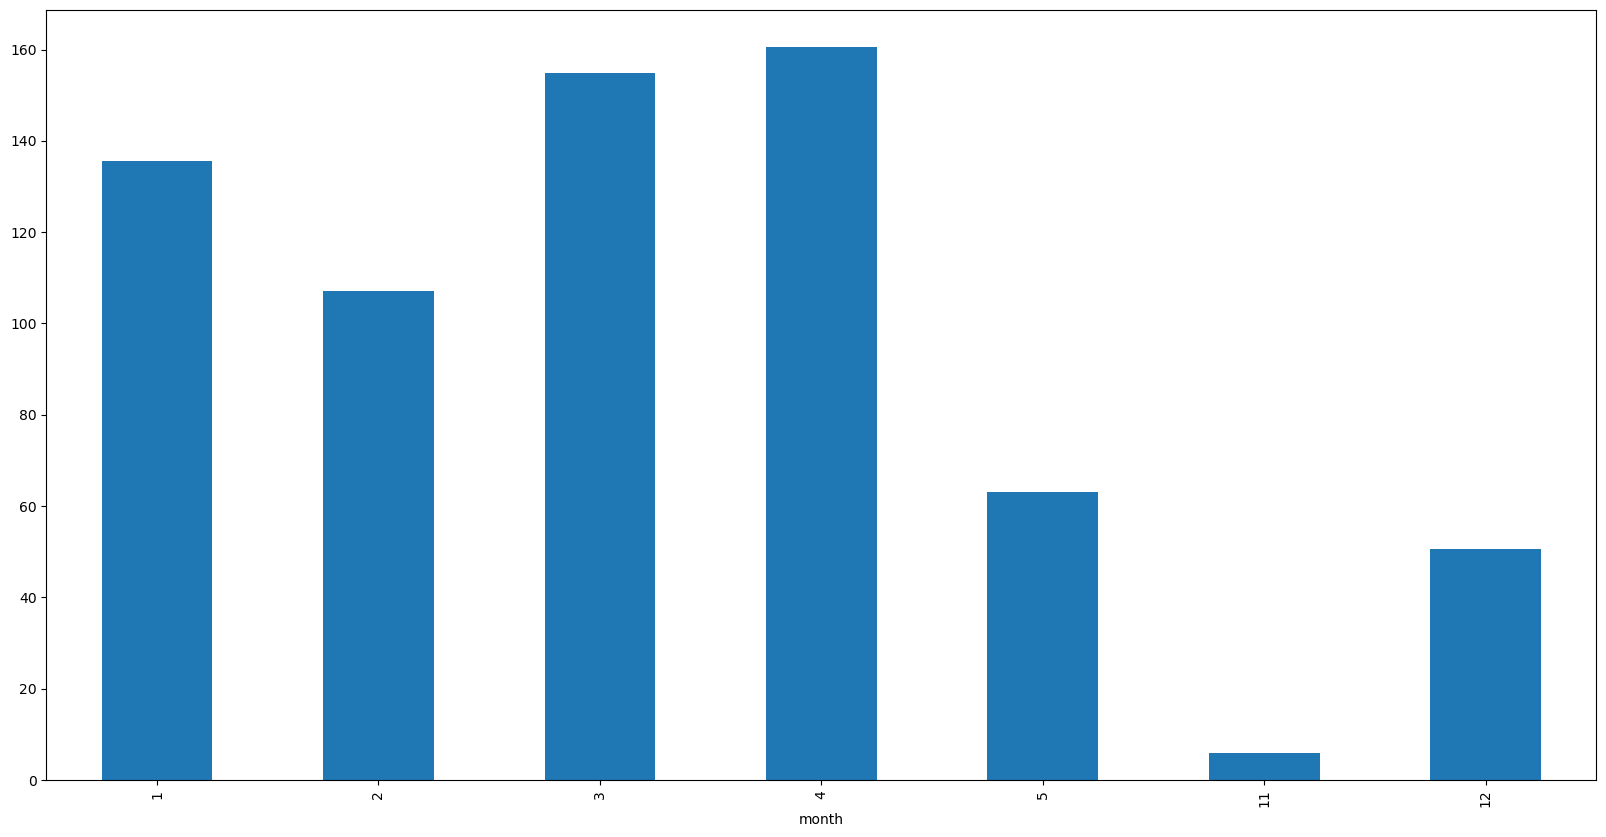

In [343]:
train.groupby('month')['clicks'].mean().plot.bar()

<Axes: xlabel='month,dayofweek'>

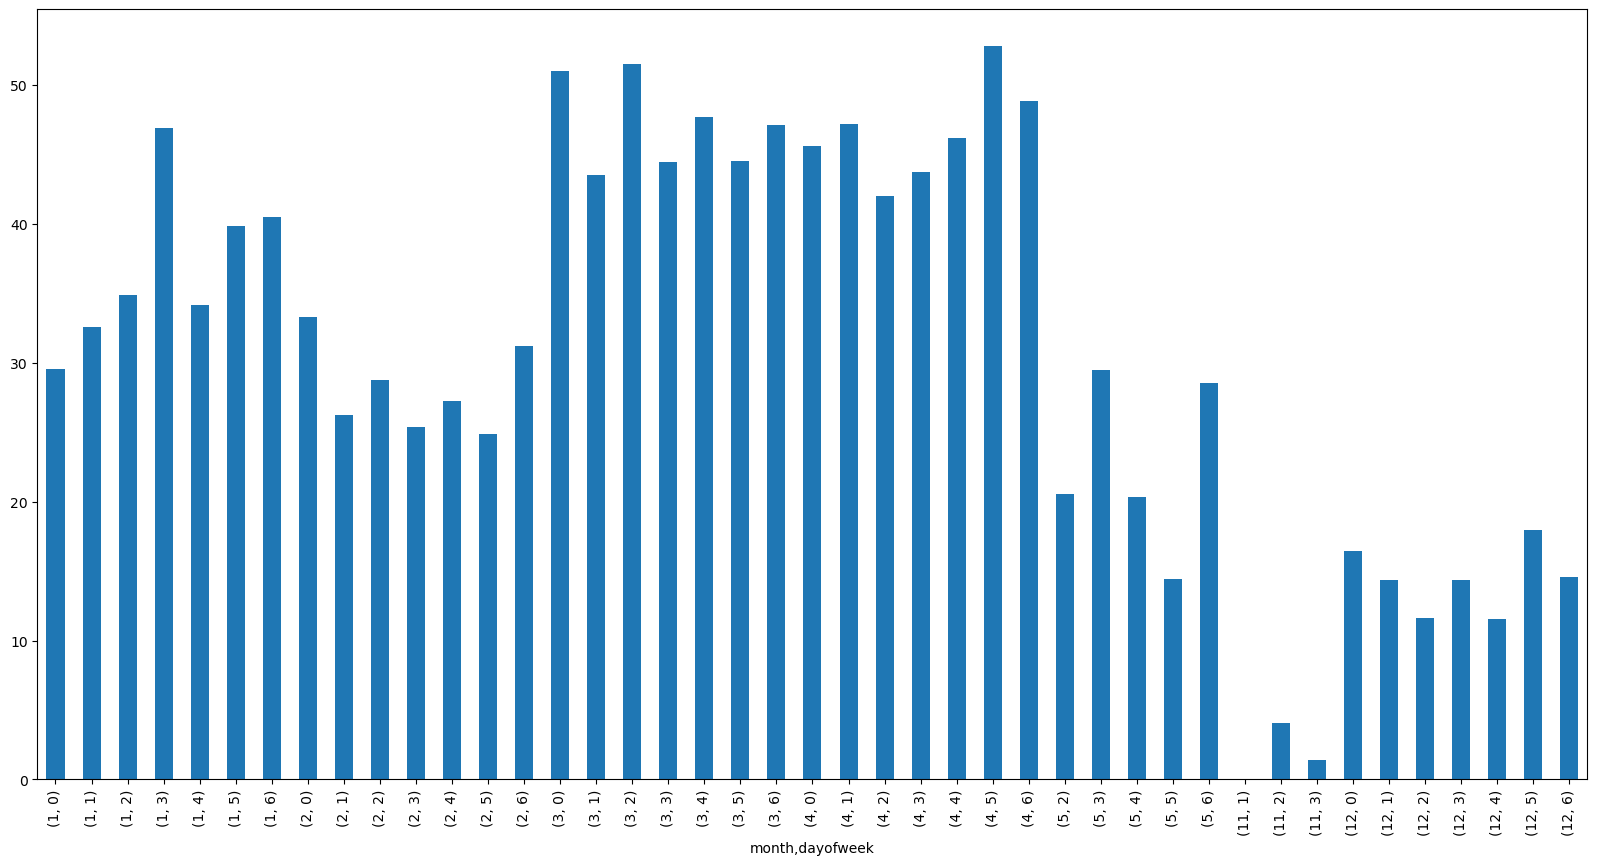

In [344]:
train.groupby(['month','dayofweek'])['Cost'].mean().plot.bar()

<Axes: xlabel='month,dayofweek'>

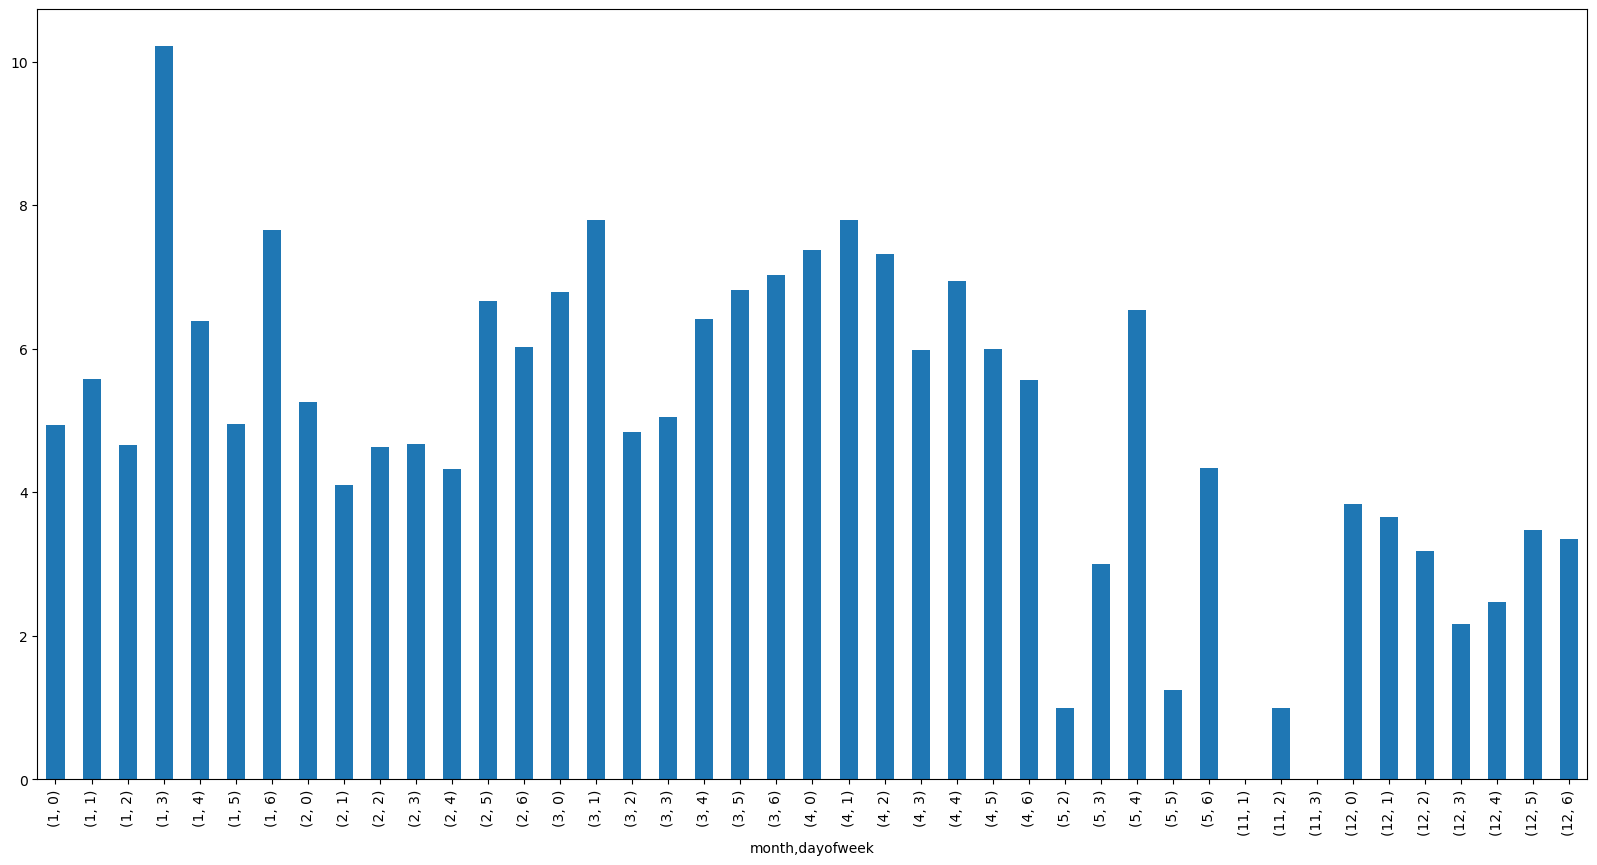

In [345]:
train.groupby(['month','dayofweek'])['conversions'].mean().plot.bar()

<Axes: title={'center': 'CPA(month wise)'}, xlabel='year,month'>

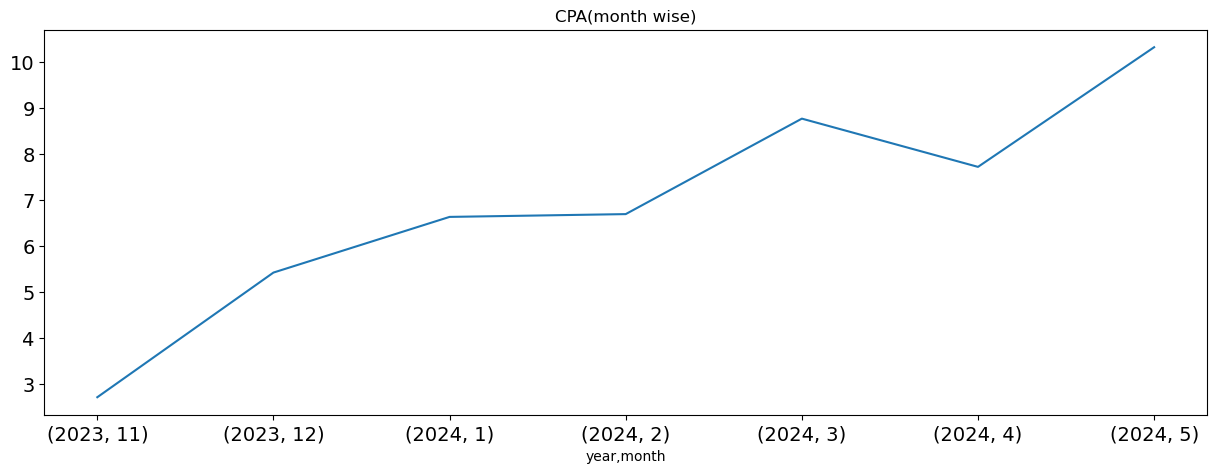

In [346]:
temp=train.groupby(['year','month'])['CPA'].mean()
temp.plot(figsize=(15,5),title='CPA(month wise)',fontsize=14)

<Axes: xlabel='day'>

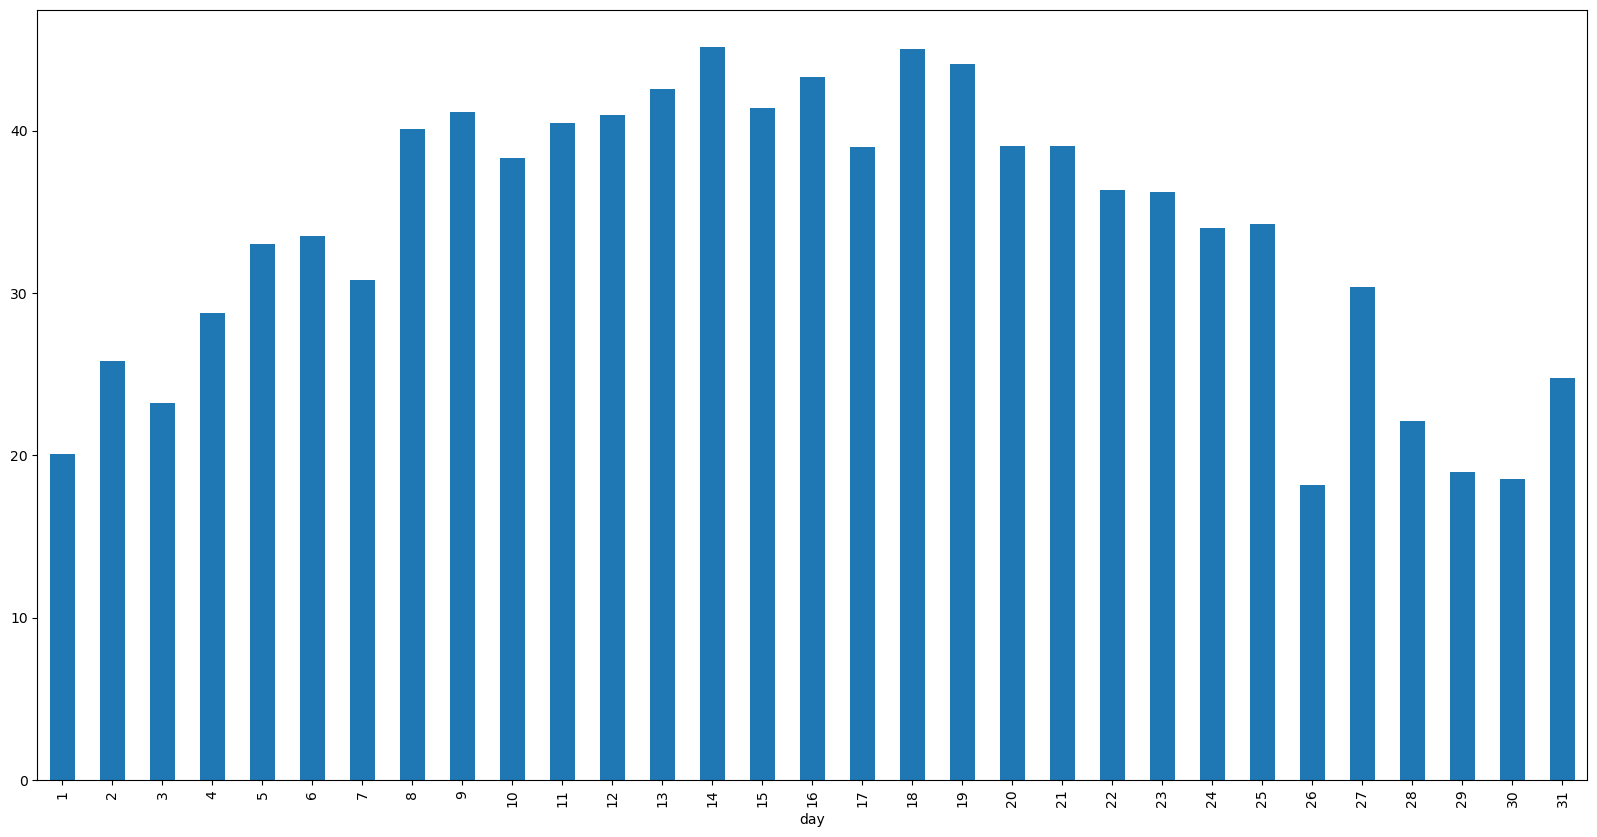

In [347]:
train.groupby('day')['Cost'].mean().plot.bar()

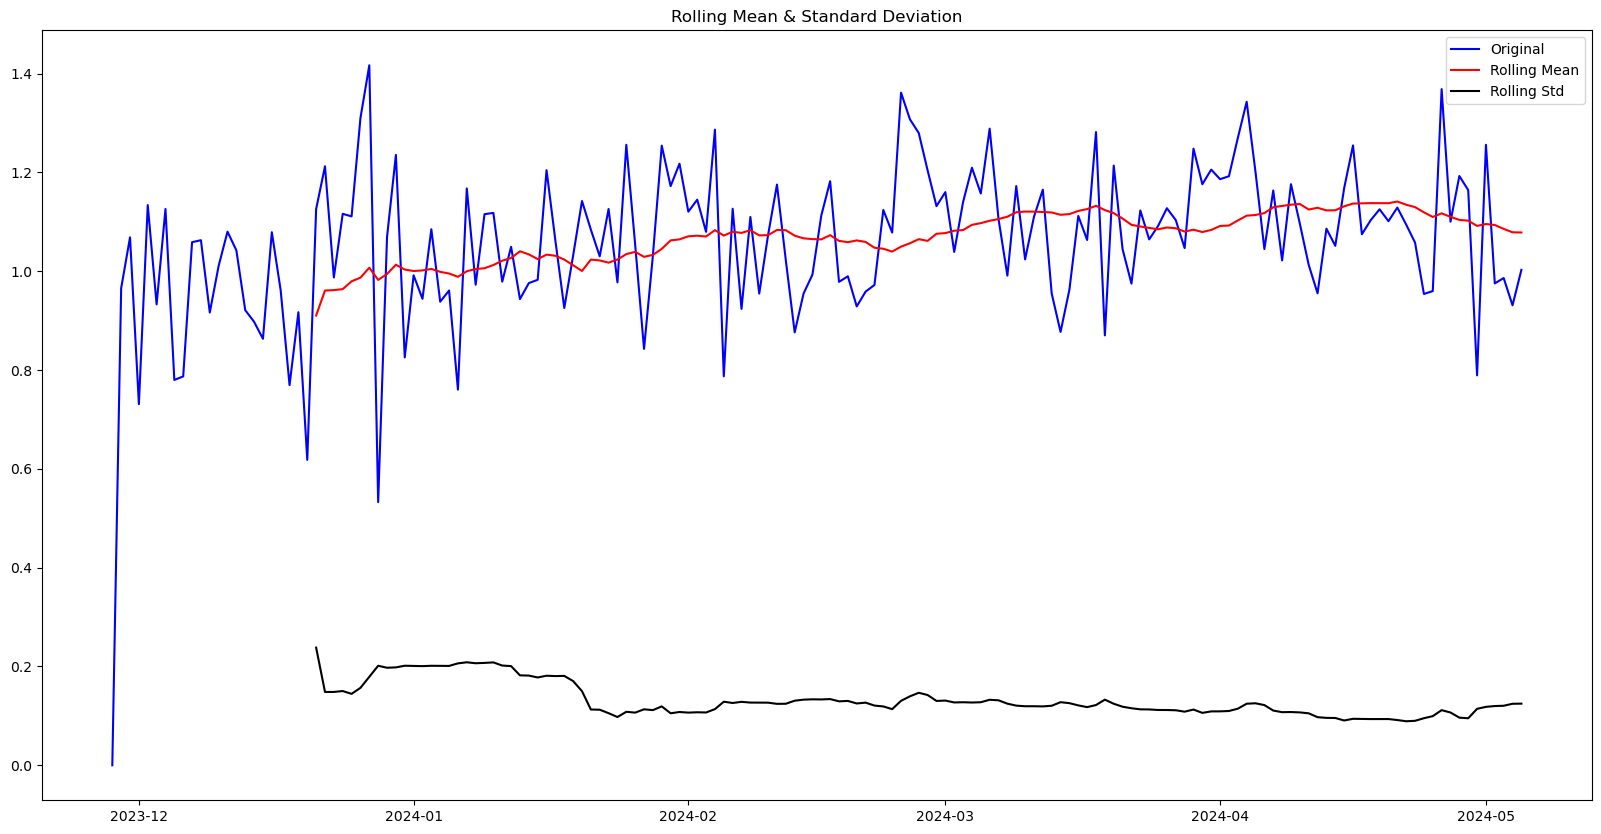

result of dickey fuller test
Test Statistics                -5.424052
p-value                         0.000003
#Lags Used                      2.000000
Number of Observation Used    157.000000
Critical Value (1%)            -3.472703
Critical Value (5%)            -2.880132
Critical Value (10%)           -2.576683
dtype: float64


In [349]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determine rolling statistics
    rolmean=timeseries.rolling(24).mean()
    rolstd=timeseries.rolling(24).std()
    #plot rolling statistics
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #perform dickey-Fuller Test
    print('result of dickey fuller test')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observation Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
test_stationarity(train['CTR'])

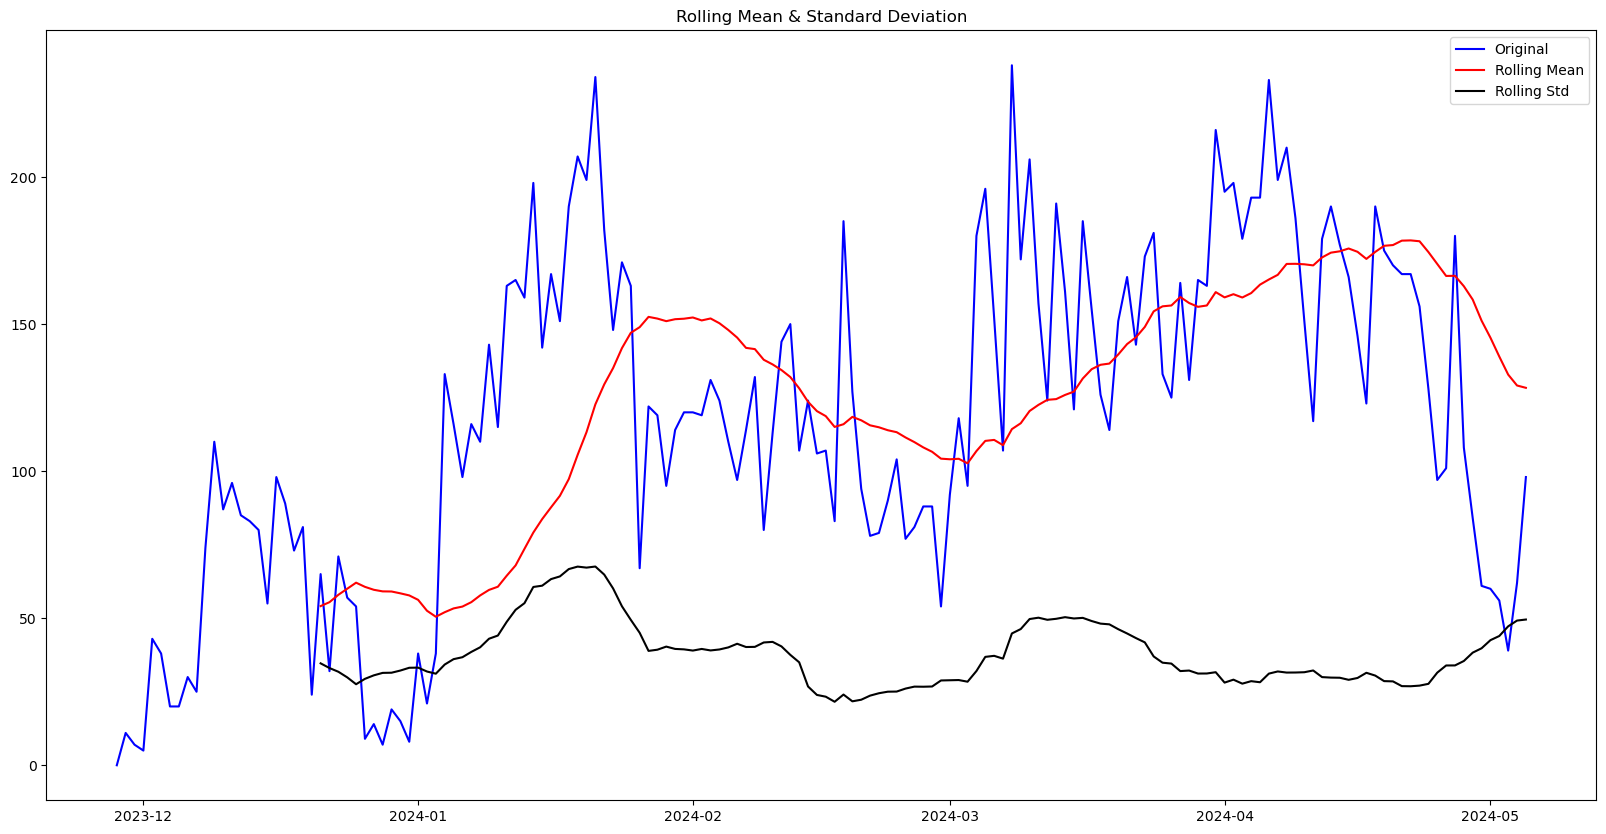

result of dickey fuller test
Test Statistics                -2.716179
p-value                         0.071280
#Lags Used                      2.000000
Number of Observation Used    157.000000
Critical Value (1%)            -3.472703
Critical Value (5%)            -2.880132
Critical Value (10%)           -2.576683
dtype: float64


In [350]:
test_stationarity(train['clicks'])

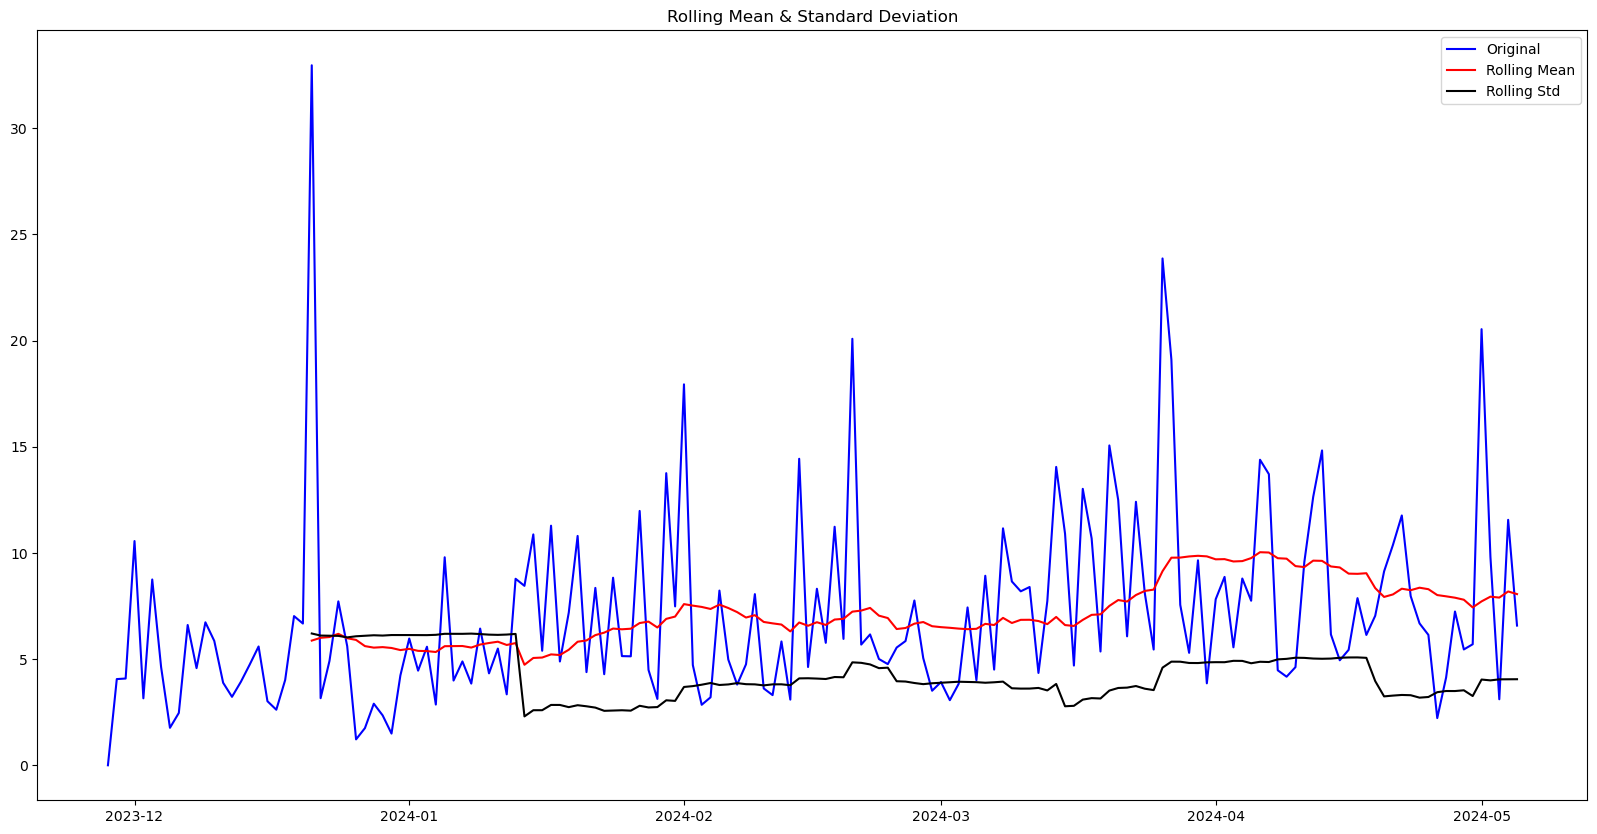

result of dickey fuller test
Test Statistics              -1.116318e+01
p-value                       2.755385e-20
#Lags Used                    0.000000e+00
Number of Observation Used    1.590000e+02
Critical Value (1%)          -3.472161e+00
Critical Value (5%)          -2.879895e+00
Critical Value (10%)         -2.576557e+00
dtype: float64


In [351]:
test_stationarity(train['CPA'])

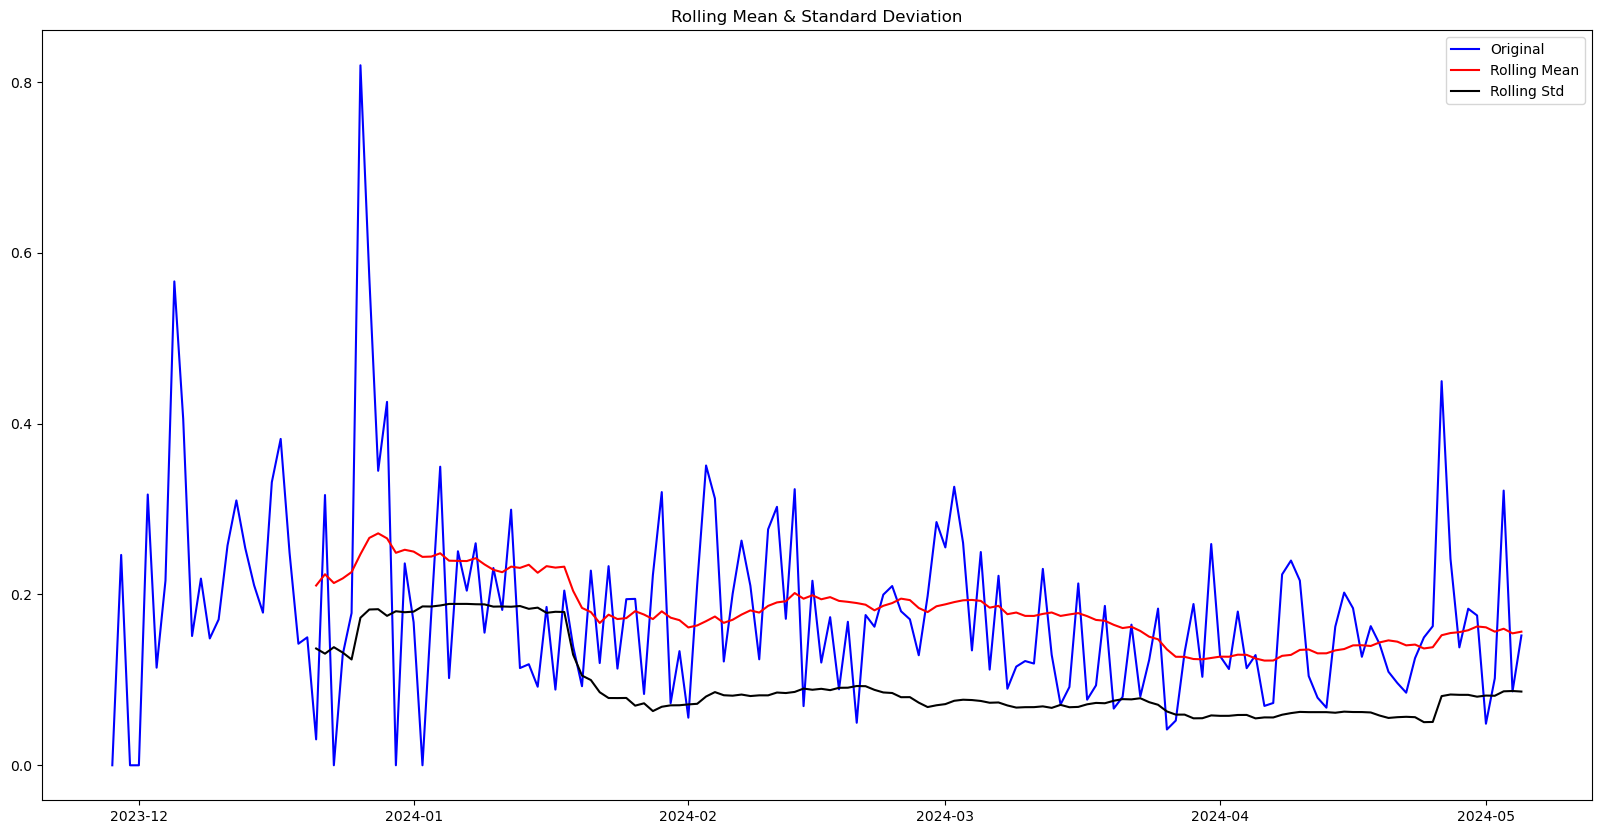

result of dickey fuller test
Test Statistics              -9.758265e+00
p-value                       7.685018e-17
#Lags Used                    0.000000e+00
Number of Observation Used    1.590000e+02
Critical Value (1%)          -3.472161e+00
Critical Value (5%)          -2.879895e+00
Critical Value (10%)         -2.576557e+00
dtype: float64


In [354]:
test_stationarity(train['conversion per euro'])

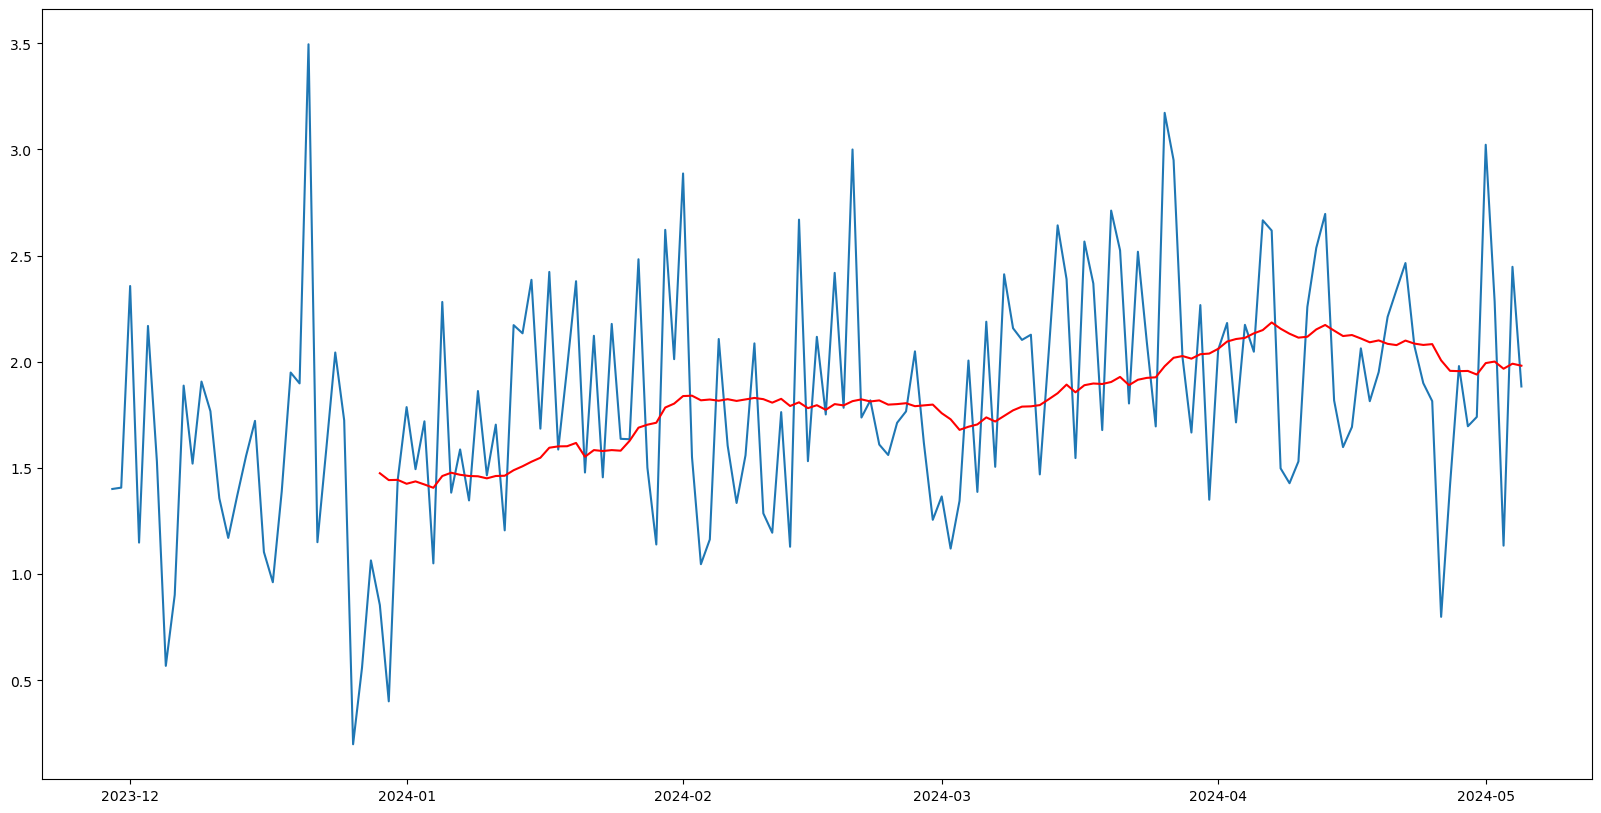

In [371]:
#remove the trend and seasonal

Train_log=np.log(train['CPA'])
valid_log=np.log(test['CPA'])

moving_avg=Train_log.rolling(31).mean()
plt.plot(Train_log)
plt.plot(moving_avg,color='red')
plt.show()

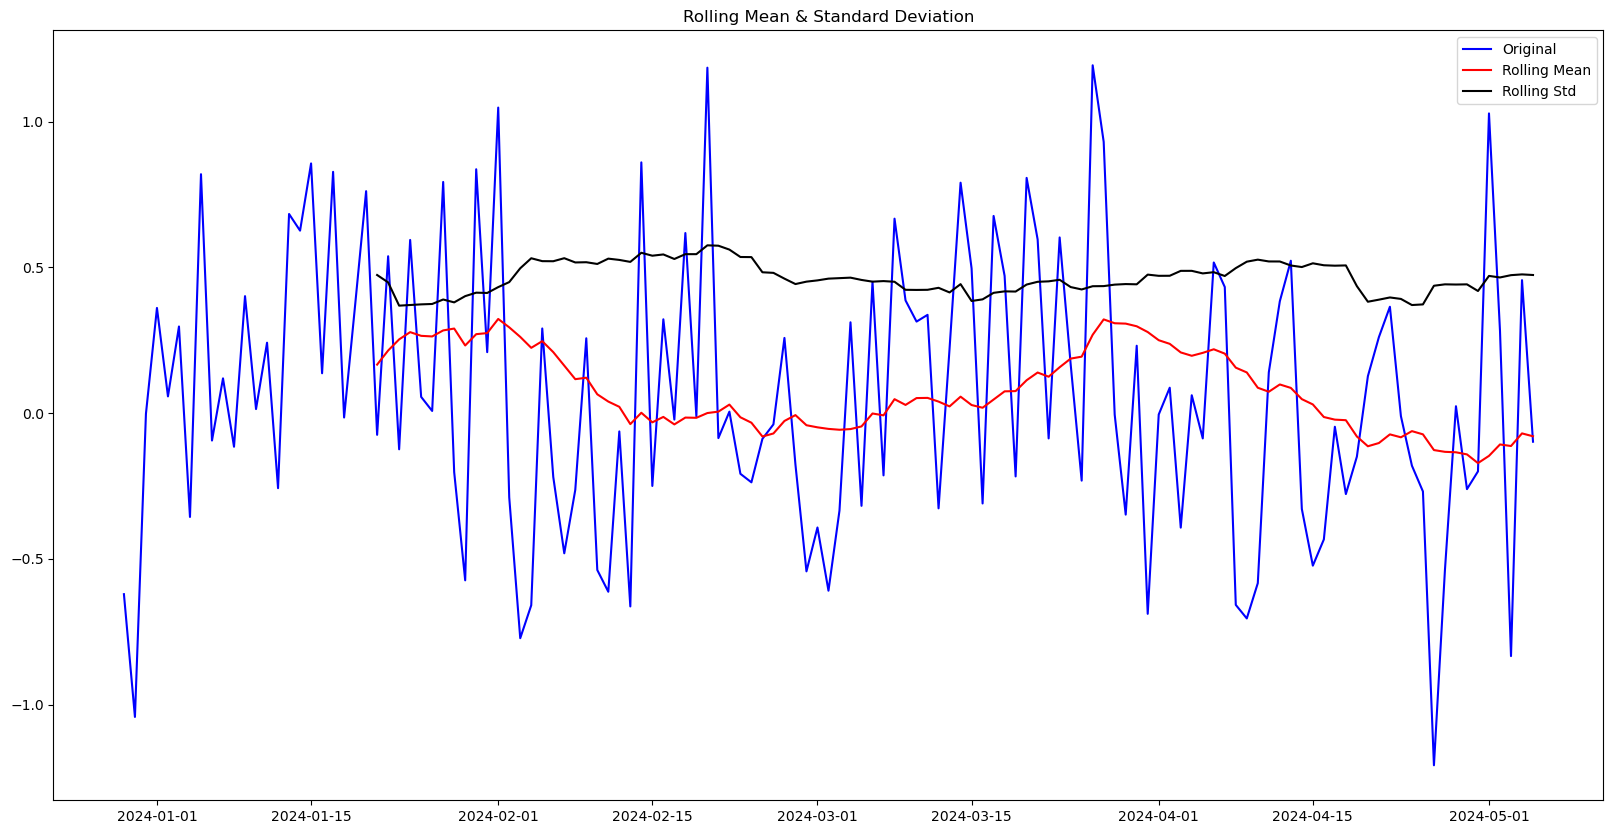

result of dickey fuller test
Test Statistics              -9.990084e+00
p-value                       2.006902e-17
#Lags Used                    0.000000e+00
Number of Observation Used    1.280000e+02
Critical Value (1%)          -3.482501e+00
Critical Value (5%)          -2.884398e+00
Critical Value (10%)         -2.578960e+00
dtype: float64


In [372]:
train_log_moving_avg_diff=Train_log-moving_avg
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)

In [393]:
Train_log.dropna(inplace=True)

In [383]:
Train_log

date
2023-11-28        -inf
2023-11-29    1.401183
2023-11-30    1.407497
2023-12-01    2.357073
2023-12-02    1.148672
                ...   
2024-05-01    3.022374
2024-05-02    2.283839
2024-05-03    1.134288
2024-05-04    2.447551
2024-05-05    1.883918
Name: CPA, Length: 160, dtype: float64

In [406]:
deco=pd.DataFrame(Train_log)

In [410]:
deco=deco.iloc[1:]

In [411]:
deco

,CPA
date,
2023-11-29,1.401183
2023-11-30,1.407497
2023-12-01,2.357073
2023-12-02,1.148672
2023-12-03,2.169054
...,...
2024-05-01,3.022374
2024-05-02,2.283839
2024-05-03,1.134288


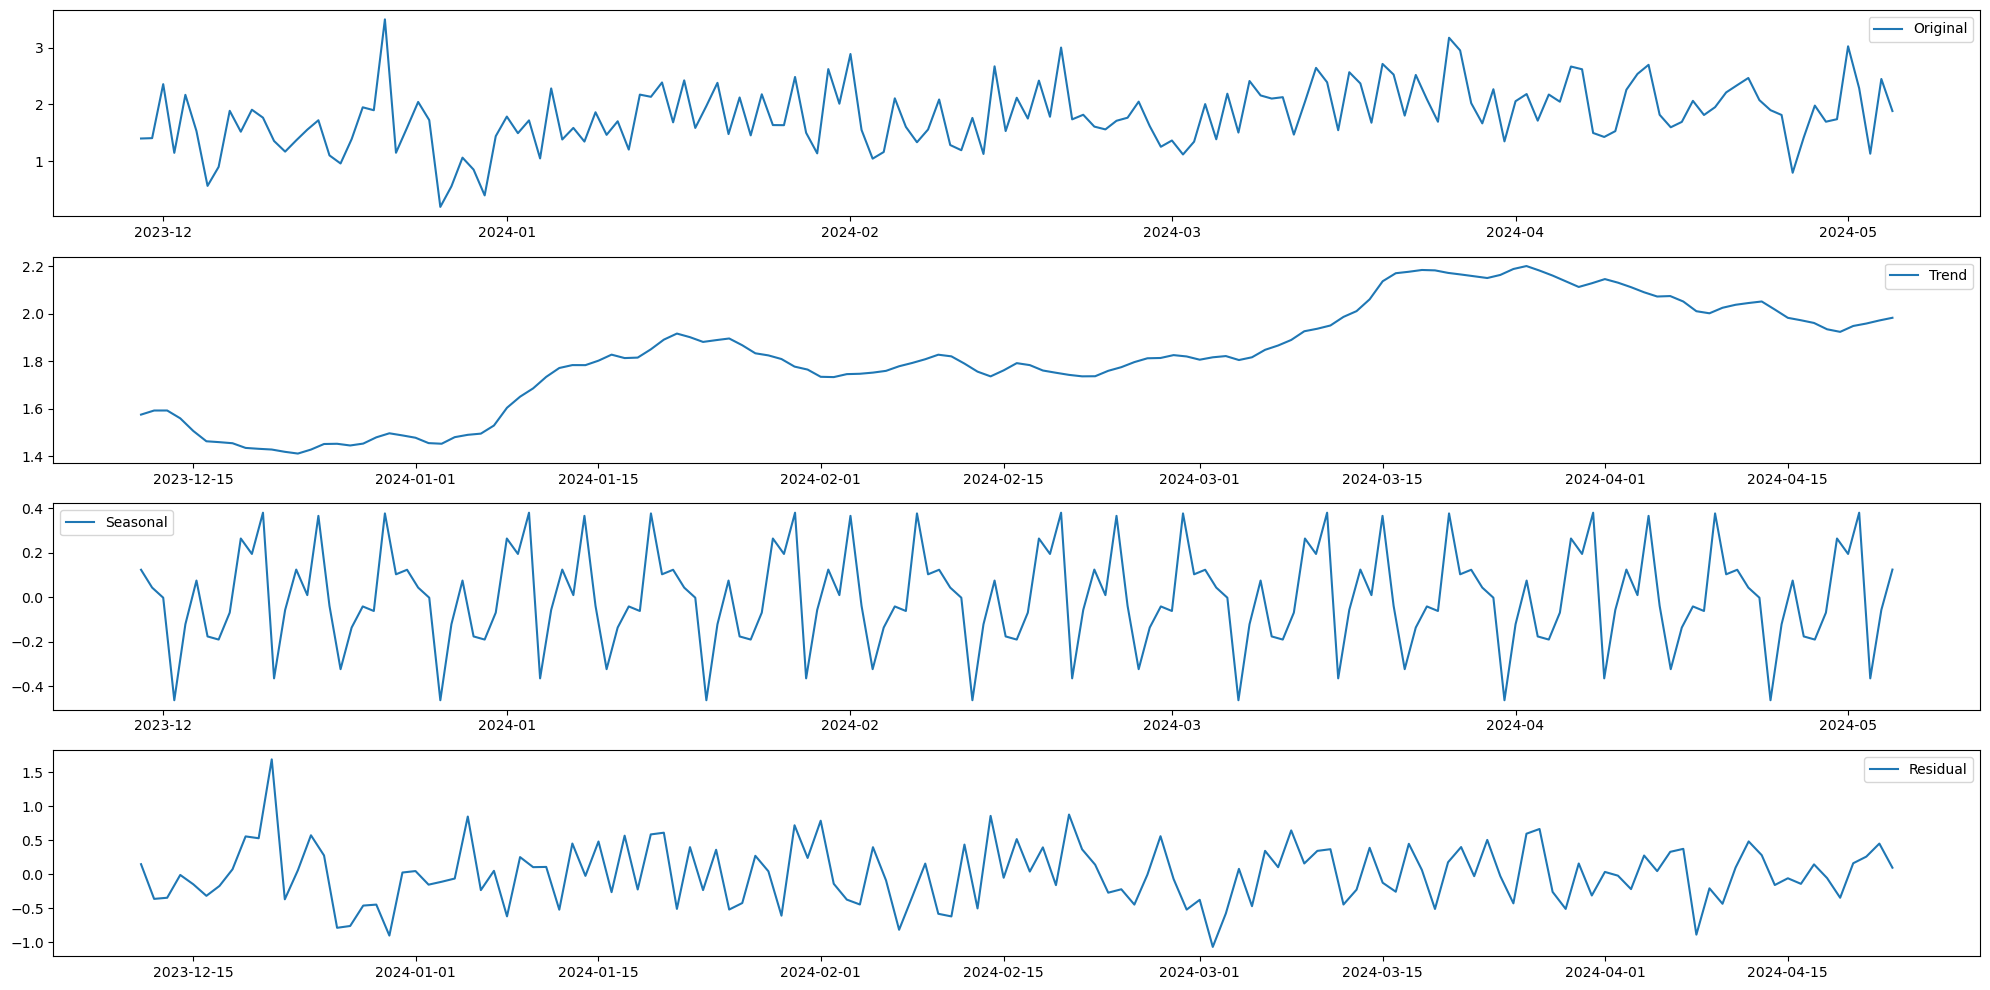

In [412]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(deco,period=24)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(Train_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

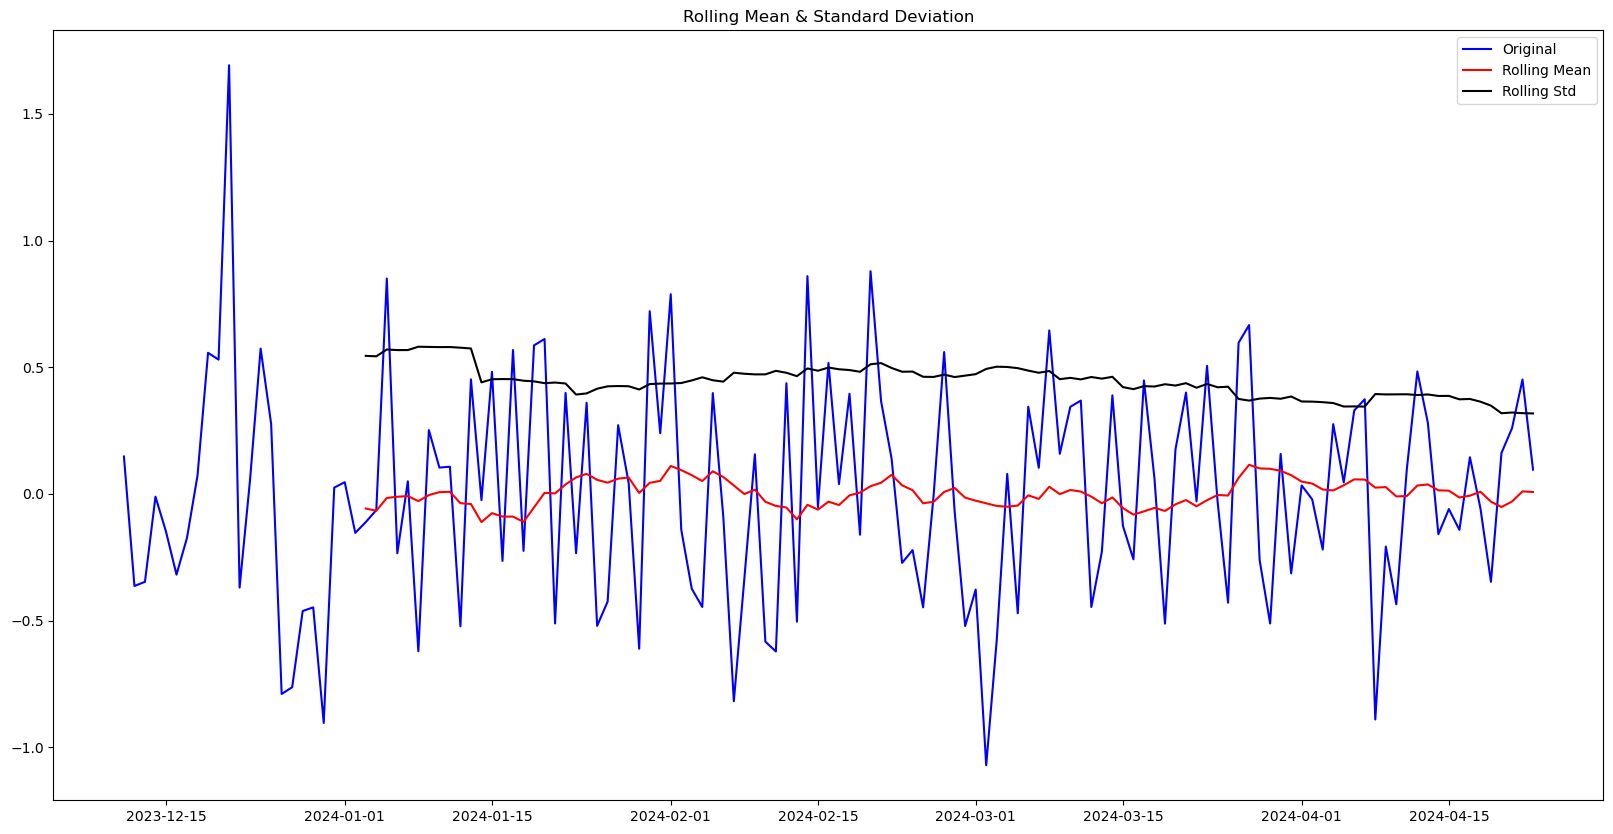

result of dickey fuller test
Test Statistics              -1.081786e+01
p-value                       1.837519e-19
#Lags Used                    0.000000e+00
Number of Observation Used    1.340000e+02
Critical Value (1%)          -3.480119e+00
Critical Value (5%)          -2.883362e+00
Critical Value (10%)         -2.578407e+00
dtype: float64


In [414]:
Train_log=Train_log.iloc[1:]
train_log_decompose=pd.DataFrame(residual)
train_log_decompose['date']=Train_log.index
train_log_decompose.set_index('date',inplace=True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose)